# Analysez des données de systèmes éducatifs

## Import

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import skimpy
from skimpy import skim
import plotly.express as px
import json
import requests
import pycountry
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Création des DataFrame

In [2]:
country_series = pd.read_csv("data/EdStatsCountry-Series.csv", sep=",", low_memory=False)
country = pd.read_csv("data/EdStatsCountry.csv", sep=",", low_memory=False)
ed_data = pd.read_csv("data/EdStatsData.csv", sep=",", low_memory=False)
foot_note = pd.read_csv("data/EdStatsFootNote.csv", sep=",", low_memory=False)
ed_series = pd.read_csv("data/EdStatsSeries.csv", sep=",", low_memory=False)

Pour ne pas modifier les DF de base, on crée des copies indépendantes. A chaque fois que le kernel sera relancé, on repartira donc avec les bonnes données de base.

In [3]:
country_series = country_series.copy()
country = country.copy()
ed_data = ed_data.copy()
foot_note = foot_note.copy()
ed_series = ed_series.copy()


#### Afficher les 5 premières lignes des DF

In [4]:
country_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [5]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [6]:
ed_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
foot_note.head(5)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [8]:
ed_series.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyse de country_series

### Description de chaque colonne

In [9]:
country_series_info = country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


**CountryCode** : le code indicatif de chaque pays  
  
**SeriesCodes** : le code Série de chaque pays  
  
**DESCRIPTION** : source des données  
  
**Unnamed** : aucune info, rempli de NaN  

*Pour faciliter la lecture du DF, on renomme DESCRIPTION en Description*

In [10]:
country_series.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [11]:
country_series.shape

(613, 4)

Le DF country_series à 613 lignes & 4 colonnes

### Calcul du nombre de doublons

In [12]:
country_series.duplicated().sum()

0

Le DF ne semble pas contenir de doublons, mais comme vu avec **head(5)**, nous avons pu voir des doublons dans **CountryCode** , regardons cela plus en détails :

In [13]:
country_series.loc[country_series['CountryCode'].duplicated(keep=False),:]

,CountryCode,SeriesCode,Description,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


On remarque que certains pays ont **deux SeriesCode**. La question qui se pose alors est : Qu'est ce qu'un **SeriesCode** ?

La colonne SeriesCode (ex. : SP.POP.TOTL) représente l’**indicateur statistique** que la ligne décrit.

C’est un code unique utilisé pour identifier une série temporelle : population, PIB, CO₂, scolarisation, etc.

Listons maintenant tous les SeriesCode existant dans le DF.

In [14]:
country_series['SeriesCode'].value_counts()

SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

### Valeurs manquantes

In [15]:
skim(country_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 613    │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Unnamed: 3        │    613 │     100 │     nan │   nan │   nan │   nan │   nan │   nan │    nan │          │  │
│ └───────────────────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                      613 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                      613 │  │
│ │ Description               │       0 │          0 │                          7.5 │                     4587 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Cette erreur indique qu’un **NaN** s’est glissé dans une division lors du calcul d’un histogramme. Celà est arrivé car la colonne **Unnamed: 3** est composée entièrement de **NaN**

### Remplissage des colonnes

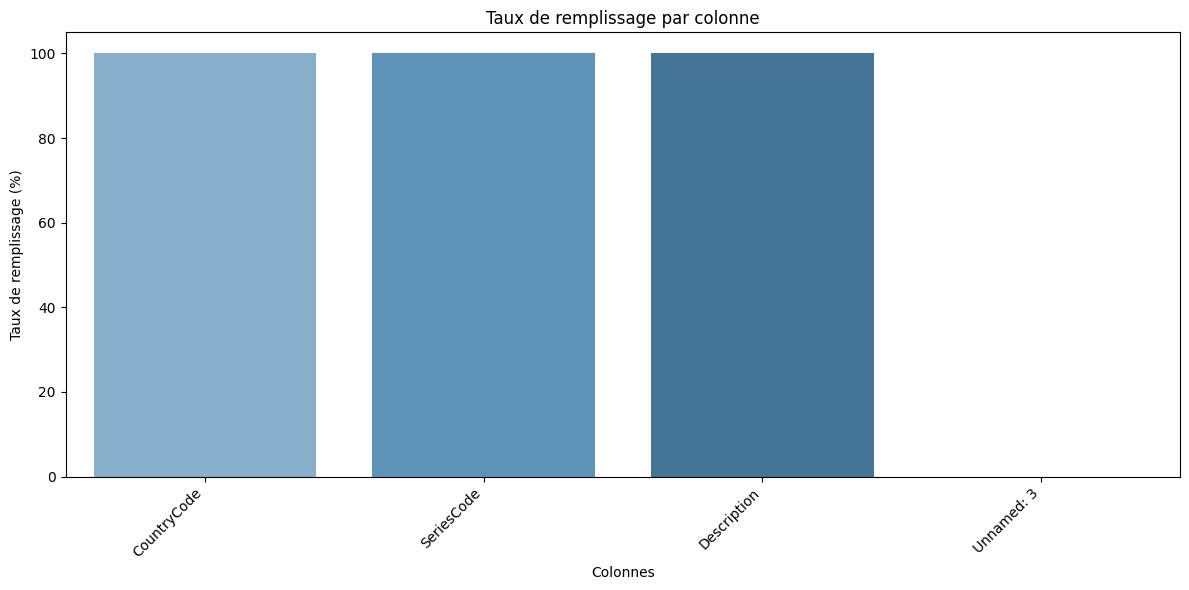

In [16]:
# 1. Calcul du taux de remplissage
taux = (country_series.notna().mean() * 100).round(2)
#### Crée un DF Booléan, avec not NaN = True, et NaN = False, avec True = 1 & False = 0. mean() calcule la proportion de valeurs
#### non manquantes, colonne par colonne. On le passage en %, arrondi à 2 décimales :: On obtient une Serie

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']
#### On transforme la Série en DF, avec deux colonnes: Colonne et TauxRemplissage

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### On crée un histogramme à barres (barplot), avec en x le nom des colonnes & en y le taux de remplissage, 
#### Avec la palette de couleurs Blues_d que l'on applique sur les colonnes

On remarque que les colonnes *CountryCode*, *SeriesCode*, et *Description* sont totalement remplies.  
La colonne *Unnamed :3* est totalement vide, on peut donc la supprimer.

In [17]:
country_series_filtered = country_series.drop("Unnamed: 3", axis=1)

In [18]:
country_series_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Description'], dtype='object')

La colonne * Unnamed :3*  a bien été supprimée.

In [19]:
country_series_filtered.describe().T

,count,unique,top,freq
CountryCode,613,211,GEO,18
SeriesCode,613,21,SP.POP.TOTL,211
Description,613,97,Data sources : United Nations World Population...,154


In [20]:
country_series_filtered.value_counts("CountryCode")

CountryCode
GEO    18
MDA    18
TZA    12
MAR    12
MUS    12
       ..
IRQ     2
ISL     2
ISR     2
ITA     2
HRV     2
Name: count, Length: 211, dtype: int64

In [21]:
country_series_filtered.value_counts("SeriesCode")

SeriesCode
SP.POP.GROW          211
SP.POP.TOTL          211
NY.GDP.PCAP.PP.KD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.CD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.0014.TO.ZS     13
SP.POP.TOTL.FE.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.KD         5
NY.GDP.PCAP.CD         5
SP.POP.0014.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.1564.MA.IN      4
Name: count, dtype: int64

In [22]:
country_series_filtered.value_counts("Description")

Description
Data sources : United Nations World Population Prospects                                                                          154
Data sources: United Nations World Population Prospects                                                                           137
Estimates are based on regression.                                                                                                 84
Data sources : Eurostat                                                                                                            54
Derived using ratio of age group from WPP and World Bank population.                                                               24
                                                                                                                                 ... 
Data sources : Statistics Greenland                                                                                                 1
Data sources : Statistics Canada                  

## Analyse de country

### Description de chaque colonne

In [23]:
country_info = country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

**Country Code** : code ISO3 à trois lettres (ex. AFG pour Afghanistan) utilisé pour identifier chaque pays de façon standardisée.  
  
**Short Name** : nom court du pays (ex. “World”, “Low & middle income”).  
  
**Table Name** : version plus longue ou formelle du nom (ex. “Dem. Rep. Congo”). 
  
**Long Name** : nom complet du pays (souvent avec précisions officielles, ex. “Republic of Congo”).  
  
**2‑alpha code** : code ISO‑3166 à deux lettres (ex. AF pour Afghanistan). 
  
**Currency Unit** : devise monétaire (ex. “US dollars”).  
  
**Special Notes** : notes spécifiques ou exceptions (ex. agrégats regionaux, méthodes).  
  
**Region** : zone géographique selon le World Bank (ex. Europe & Central Asia). 
  
**Income Group** : classification par revenu (Low, Lower‐middle, Upper‐middle, High income). 
  
**WB‑2 code** : code interne abrégé utilisé par la Banque mondiale pour régions/groupes (ex. UMC pour upper-middle income). 
  
**National accounts base year** : année de base utilisée pour les comptes nationaux.  
  
**National accounts reference year** : année de référence statistique.  
  
**SNA price valuation** : méthode d’évaluation des prix selon Système des comptes nationaux (ex. bas prix, prix marché). 
  
**Lending category** : type de financement auquel le pays a accès (IDA = prêt concessionnel, IBRD etc.). 

**Other groups** : appartenance à d’autres groupes (ex. EMU, HIPC).  
  
**System of National Accounts** : version du SNA appliquée (1993, 2008…).  
  
**Alternative conversion factor** : facteur de conversion alternatif pour certaines données.  
  
**PPP survey year** : année des données d’évaluation par Parité de Pouvoir d’Achat. 
  
**Balance of Payments Manual in use** : version du manuel BOP utilisée (BPM6…). 
  
**External debt Reporting status** : statut du pays concernant le reporting de sa dette externe (ex. “Actual”). 

**System of trade** : type de collecte des données commerciales (ex. “General trade system”).
  
**Government Accounting concept** : méthode de comptabilité gouvernementale (ex. centralisé). 
  
**IMF data dissemination standard** : norme suivie selon FMI (e‑GDDS, SDDS…). 
  
**Vital registration complete** : si le pays a un système complet d’enregistrement des naissances/décès.  

**Latest population census** : année du dernier recensement. 
  
**Latest household survey** : dernière enquête ménages (ex. DHS, MICS).  
  
**Source of most recent Income and expenditure data** : référence de la donnée la plus récente (ex. Living Standards Measurement Study). 
  
**Latest agricultural census / industrial data / trade data / water withdrawal data** : année de la dernière information disponible sur ces thèmes.  

In [24]:
country = country.drop("Unnamed: 31", axis=1)

### Nombre de lignes & colonnes 

In [25]:
country.shape

(241, 31)

Le DF country à *241 lignes* &  *32 colonnes*

### Calcul du nombre de doublons

In [26]:
country.duplicated().sum()

0

In [27]:
country.loc[country['Country Code'].duplicated(keep=False),:]
### On regarde si chaque ligne de 'Country Code' existe plusieurs fois.

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data


Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [28]:
skim(country)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 241    │ │ string      │ 28    │                                                          │
│ │ Number of columns │ 31     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ National accounts        │  209 │  86.72 │  2002 │  5.249 │  1987 │  1997 │  2002 │  2005 │  2012 │ ▁▁▅▆▇▁ │  │
│ │ reference year           │      │        │       │        │       │       │       │       │       │        │  │
│ │ Latest industrial data   │  134 │   55.6 │  2008 │  2.617 │  2000 │  2008 │  2009 │  2010 │  2010 │ ▁▁ ▁▂▇ │  │
│ │ Latest trade data        │   56 │  23.24 │  2011 │   2.57 │  1995 │  2011 │  2012 │  2012 │  2012 │     ▁▇ │  │
│ └──────────────────────────┴──────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Country Code                        │       0 │          0 │                       1 │                 241 │  │
│ │ Short Name                          │       0 │          0 │                     1.7 │                 401 │  │
│ │ Table Name                          │       0 │          0 │                     1.7 │                 404 │  │
│ │ Long Name                           │       0 │          0 │                     3.2 │                 777 │  │
│ │ 2-alpha code                        │       3 │       1.24 │                    0.99 │                 238 │  │
│ │ Currency Unit                       │      26 │      10.79 │                     1.9 │                 453 │  │
│ │ Special Notes                       │      96 │      39.83 │                      17 │                4082 │  │
│ │ Region                              │      27 │       11.2 │                     3.1 │                 759 │  │
│ │ Income Group                        │      27 │       11.2 │                     2.5 │                 608 │  │
│ │ WB-2 code                           │       1 │       0.41 │                       1 │                 240 │  │
│ │ National accounts base year         │      36 │      14.94 │                     1.6 │                 390 │  │
│ │ SNA price valuation                 │      44 │      18.26 │                     4.9 │                1182 │  │
│ │ Lending category                    │      97 │      40.25 │                     0.6 │                 144 │  │
│ │ Other groups                        │     183 │     

In [29]:
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [30]:
country.head(5)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


Comme nous avons les **CountryCode**, les colonnes  **Table Name**, **Long Name** et **2-alphacode** n'ont pas d'utilité pour notre analyse. On remarque également que **Short Name** correspond à **Country Name** dans les autres DF. Nous pouvons donc la renomer.

In [31]:
country.rename(columns={'Short Name': 'Country Name'}, inplace=True)

In [32]:
useless_columns = ['Table Name', 'Long Name', '2-alpha code']

In [33]:
country_filtered = country.drop(columns=useless_columns)

In [34]:
country_filtered.head(5)

,Country Code,Country Name,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


## Analyse de ed_data

### Description de chaque colonne

In [35]:
ed_data_info = ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

**Country Name** : le nom de chaque pays  
  
**Country Code** : le code indicatif de chaque pays  

**Indicateur Name** : le code de chaque indicateur de pays   

**Indicateur Code** : le code Indicateur de chaque pays  

**1970 - 2100** : Années sur lesquelles les données ont été calculées    


In [36]:
ed_data = ed_data.drop("Unnamed: 69" , axis=1)

In [37]:
ed_data.value_counts("Country Name")

Country Name
Zimbabwe                3665
Afghanistan             3665
Ukraine                 3665
United Arab Emirates    3665
United Kingdom          3665
                        ... 
Angola                  3665
Antigua and Barbuda     3665
Arab World              3665
Argentina               3665
Armenia                 3665
Name: count, Length: 242, dtype: int64

In [38]:
ed_data.value_counts("Country Code")

Country Code
ZWE    3665
ABW    3665
URY    3665
USA    3665
UZB    3665
       ... 
ARB    3665
ARE    3665
ARG    3665
ARM    3665
ASM    3665
Name: count, Length: 242, dtype: int64

In [39]:
ed_data.value_counts("Indicator Code")

Indicator Code
XGDP.56.FSGOV.FDINSTADM.FFD    242
BAR.NOED.1519.FE.ZS            242
BAR.NOED.1519.ZS               242
BAR.NOED.15UP.FE.ZS            242
BAR.NOED.15UP.ZS               242
                              ... 
BAR.NOED.5559.FE.ZS            242
BAR.NOED.5559.ZS               242
BAR.NOED.6064.FE.ZS            242
BAR.NOED.6064.ZS               242
BAR.NOED.6569.FE.ZS            242
Name: count, Length: 3665, dtype: int64

In [40]:
ed_data.value_counts("Indicator Name")

Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                  242
Adjusted net enrolment rate, lower secondary, both sexes (%)                                           242
Adjusted net enrolment rate, lower secondary, female (%)                                               242
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)                                242
Adjusted net enrolment rate, lower secondary, male (%)                                                 242
                                                                                                      ... 
Adult literacy rate, population 15+ years, both sexes (%)                                              242
Adult literacy rate, population 15+ years, female (%)                                                  242
Adult literacy rate, population 15+ years, gender parity index (GPI)                                   242
Adult literacy rate, p

### Nombre de lignes & colonnes 

In [41]:
ed_data.shape

(886930, 69)

Le DF ed_data à **88693 lignes** & **70 colonnes**

### Calcul du nombre de doublons

In [42]:
ed_data.duplicated().sum()

0

In [43]:
ed_data.loc[ed_data['Country Code'].duplicated(keep=False),:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [44]:
skim(ed_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 886930 │ │ float64     │ 65    │                                                          │
│ │ Number of columns │ 69     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃        ┃       ┃           ┃           ┃         ┃       ┃       ┃        ┃           ┃        ┃  │
│ ┃ me        ┃ NA     ┃ NA %  ┃ mean      ┃ sd        ┃ p0      ┃ p25   ┃ p50   ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ 1970      │ 814642 │ 91.85 │ 197500000 │ 121200000 │  -1.436 │  0.89 │ 6.318 │  62.51 │ 190400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1971      │ 851393 │ 95.99 │ 425400000 │ 180500000 │  -1.595 │ 8.853 │ 63.16 │  56550 │ 198600000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1972      │ 851311 │ 95.98 │ 459200000 │ 191400000 │  -3.057 │ 9.241 │ 66.55 │  58640 │ 210100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1973      │ 851385 │ 95.99 │ 510500000 │ 205900000 │  -4.033 │ 9.595 │  69.7 │  62030 │ 223800000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1974      │ 851200 │ 95.97 │ 540100000 │ 211200000 │  -4.214 │ 9.862 │ 70.88 │  63840 │ 228300000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1975      │ 799624 │ 90.16 │ 231400000 │ 137500000 │  -3.659 │   1.4 │ 9.677 │  78.54 │ 230100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1976      │ 849447 │ 95.77 │ 573200000 │ 221600000 │  -2.951 │ 9.313 │ 71.02 │  56830 │ 242400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1977      │ 849356 │ 95.76 │ 612400000 │ 232500000 │  -3.175 │  9.52 │ 71.33 │  57390 │ 252100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1978      │ 849354 │ 95.76 │ 667100000 │ 247400000 │  -3.559 │    10 │ 72.91 │  59400 │ 262200000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1979      │ 850121 │ 95.85 │ 743700000 │ 266100000 │  -2.974 │    10 │  75.1 │  64120 │ 273100000 │   ▇    │  │
│ │           │        │       │         0 │       000 │         │       │       │        │     00000 │        │  │
│ │ 1980      │ 797808 │ 89.95 │ 328400000 │ 178100000 │  -1.404 │  1.77 │ 11.07 │  82.03 │ 278400000 │   ▇    │  │
│ │           │        │       │         0 │       000 │

### Taux de remplissage des colonnes

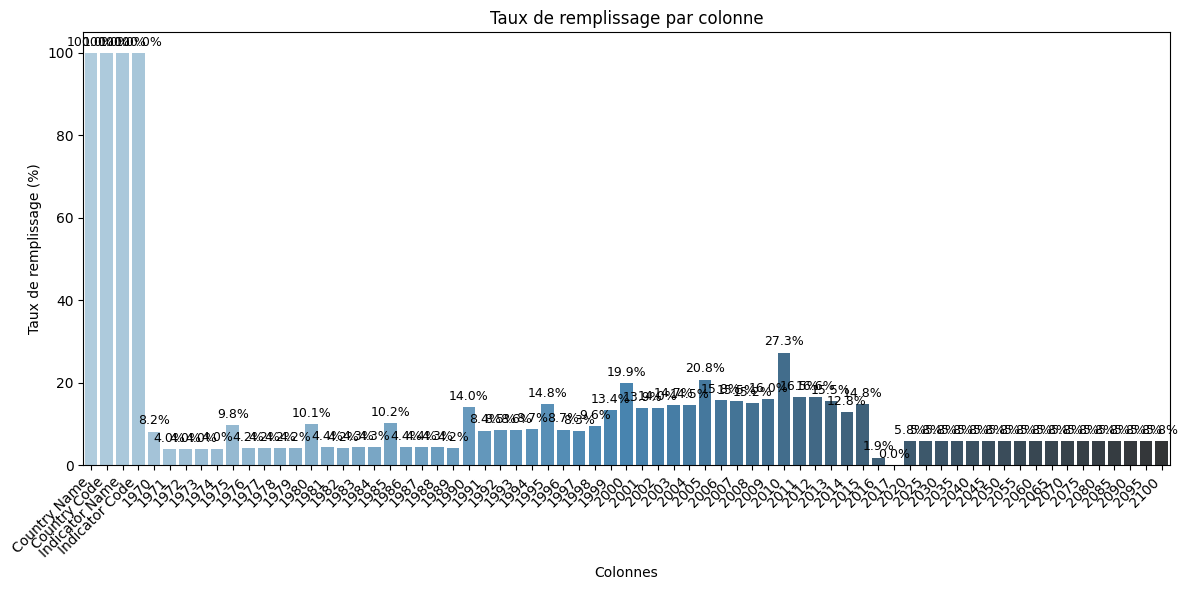

In [45]:
# 1. Calcul du taux de remplissage
taux = (ed_data.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

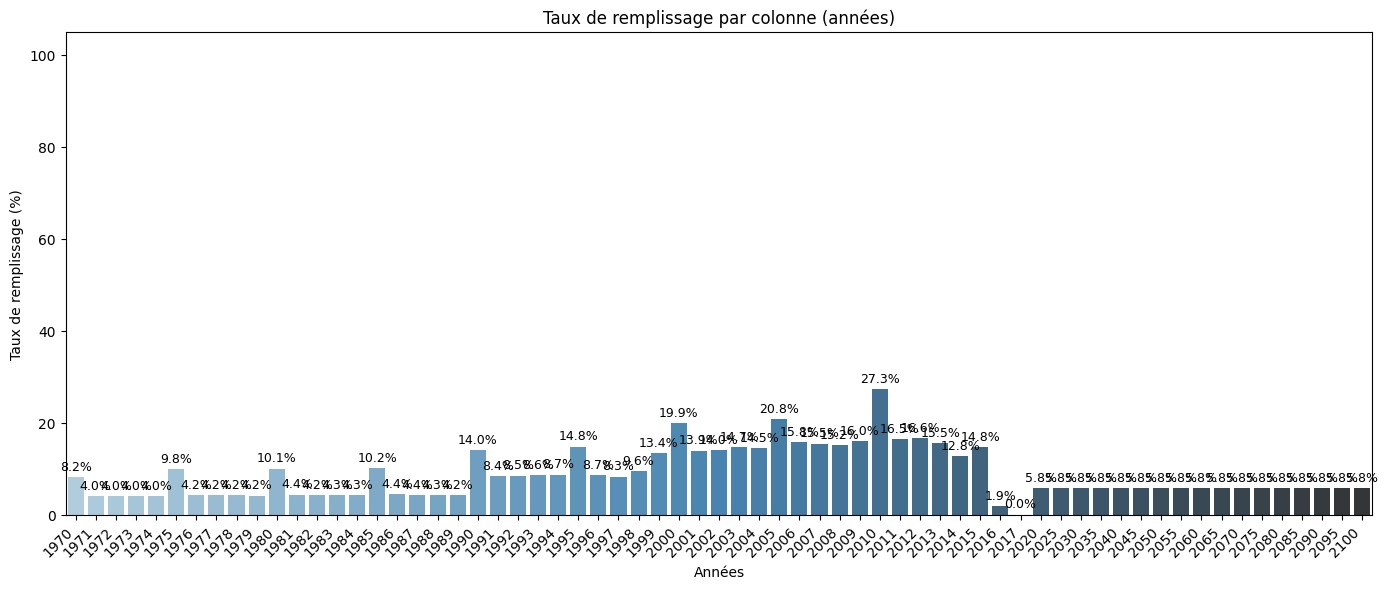

In [46]:
# 1. Sélectionner les colonnes de type année (supposons qu'elles commencent à l'index 4)
years_cols = ed_data.columns[4:]

# 2. Calculer le taux de remplissage pour chaque colonne
taux = ed_data[years_cols].notna().mean() * 100
taux = taux.round(2)

# 3. Transformation en DataFrame pour l'affichage
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage avec seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',
    palette='Blues_d'
)

# 5. Ajouter les étiquettes au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Créons une matrice de corrélation (pearson) pour voir les corrélation entre les années

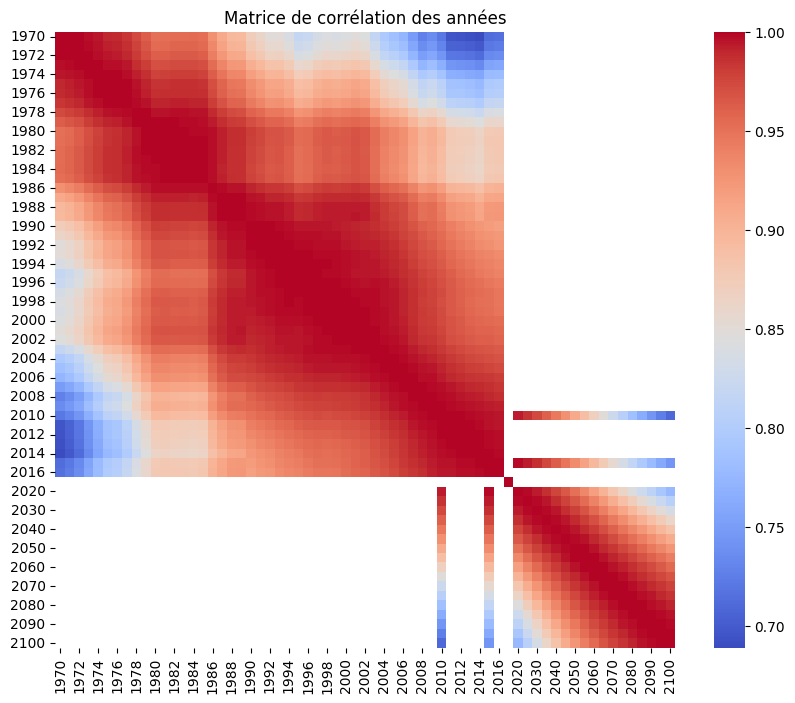

In [47]:
# Étape 1 : Sélectionnons les colonnes ayant des valeurs numériques ( dans le cas de ce DF, nous n'avons que les années)
years = ed_data.select_dtypes(include='number')

# Étape 2 : Calculer la matrice de corrélation avec la méthode pearson
years_correlation_matrix = years.corr(method='pearson')

# Etape 3 : Affichage de la matrice en mode Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Les données à partir de **2020** sont des projections. Celles au-delà de 2040 présentent un niveau d’incertitude élevé, rendant leur interprétation et leur exploitation moins fiables dans le cadre d’une prise de décision concrète.  

In [48]:
ed_data.shape

(886930, 69)

## Analyse de foot_note

### Description de chaque ligne

In [49]:
foot_note_info = foot_note.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


**CountryCode** : le code indicatif de chaque pays  
**SeriesCodes** : le code Série de chaque pays  
**Year** : l'année sur laquelle les datas sont données  
**DESCRIPTION** : source des données    

In [50]:
foot_note.rename(columns={'DESCRIPTION': 'Description'}, inplace=True)

### Nombre de lignes & colonnes 

In [51]:
foot_note.shape

(643638, 5)

### Calcul du nombre de doublons

In [52]:
foot_note.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [53]:
skim(foot_note)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 643638 │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA        ┃ NA %    ┃ mean   ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Unnamed: 4       │    643638 │     100 │    nan │   nan │   nan │   nan │   nan │   nan │    nan │         │  │
│ └──────────────────┴───────────┴─────────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CountryCode               │       0 │          0 │                            1 │                   643638 │  │
│ │ SeriesCode                │       0 │          0 │                            1 │                   643638 │  │
│ │ Year                      │       0 │          0 │                            1 │                   643638 │  │
│ │ Description               │       0 │          0 │                          3.4 │                  2186579 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

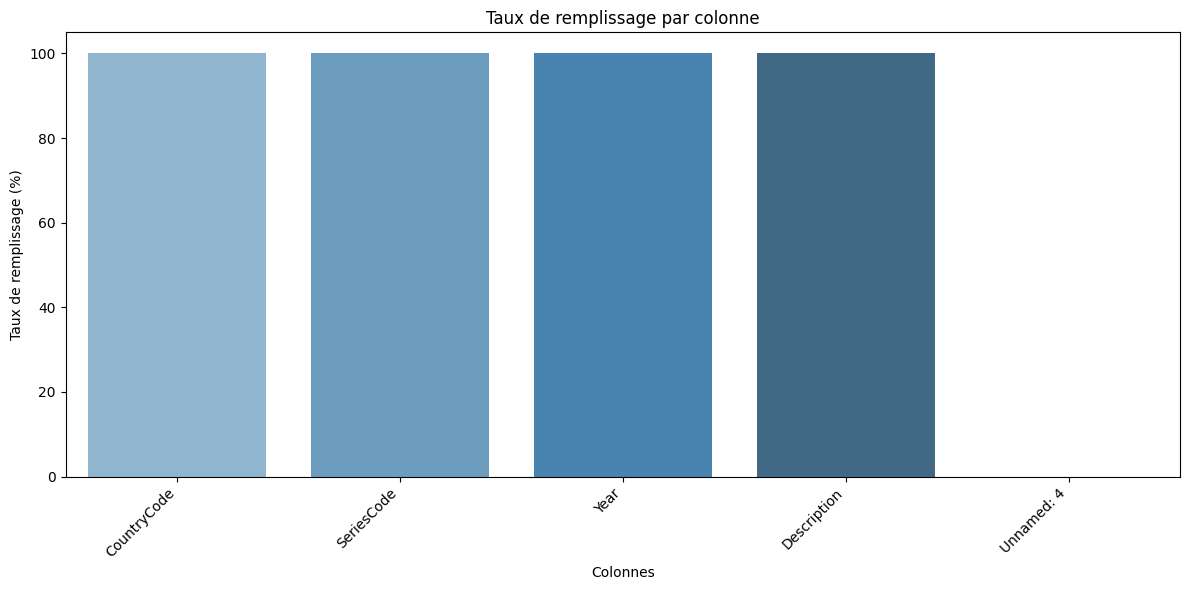

In [54]:
# 1. Calcul du taux de remplissage
taux = (foot_note.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage avec seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne',  palette='Blues_d')

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les colonnes *CountryCode*, *SeriesCode*, *Year* et *DESCRIPTION* sont totalement remplies.  
La colonne *Unnamed :4* est totalement vide, on peut donc la supprimer.

In [55]:
foot_note_filtered = foot_note.drop("Unnamed: 4", axis=1)

In [56]:
foot_note_filtered.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'Description'], dtype='object')

La colonne **Unnamed :4**  a bien été supprimée.

In [57]:
foot_note_filtered.describe().T

,count,unique,top,freq
CountryCode,643638,239,LIC,7320
SeriesCode,643638,1558,SH.DYN.MORT,9226
Year,643638,56,YR2004,27128
Description,643638,9102,Country Data,191188


In [58]:
foot_note_filtered.value_counts("CountryCode")

CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

In [59]:
foot_note_filtered.value_counts("SeriesCode")

SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
UIS.XPubP.0                     1
UIS.XPubP.4                     1
UIS.XPubP.uk                    1
UIS.XSPENDP.1.FDPUB.FNCAP       1
UIS.XSPENDP.1.FDPUB.FNCUR       1
Name: count, Length: 1558, dtype: int64

In [60]:
foot_note_filtered.value_counts("Year")

Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
YR1991    11129
YR1993    11093
YR1990    10616
YR1986     9743
YR1985     9653
YR1989     9517
YR1981     9465
YR1984     9386
YR1988     9382
YR1987     9357
YR1983     9227
YR1982     9014
YR1980     8950
YR1979     8742
YR1976     8729
YR1972     8661
YR1975     8627
YR1977     8593
YR1978     8585
YR1973     8571
YR1974     8512
YR1971     8507
YR2015     6348
YR1970     5374
YR2016      819
YR2017      558
YR2035      144
YR2050      144
YR2045      144
YR2040      144
YR2030      140
YR2025      140
YR2020      140
yr2012       14
Name: count, dtype: int64

In [61]:
foot_note_filtered.value_counts("Description")

Description
Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 171.4 - 193.5                     1
Uncertainty bound is 171.4 - 195.2                     1
Uncertainty bound is 171.5 - 185.1                     1
Uncertainty bound is 171.5 - 189.7                     1
Uncertainty bound is 171.1 - 192.8                     1
Name: count, Length: 9102, dtype: int64

In [62]:
foot_note_filtered.shape

(643638, 4)

## Analyse de ed_series

### Description de chaque colonne

In [63]:
ed_series_info = ed_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

**Series Code**	Code unique identifiant chaque indicateur (ex: SP.POP.TOTL)  
  
**Topic	Catégorie** à laquelle appartient l’indicateur (ex: Population, Infrastructure)  
  
**Indicator Name**	Nom complet de l’indicateur (ex: Population, total)  
  
**Short definition**	Définition courte de l’indicateur (souvent absente ou redondante avec la longue)  
  
**Long definition**	Définition complète et précise de ce que mesure l’indicateur  
  
**Unit of measure**	Unité utilisée (ex. people, %, US dollars) — vide ici  
  
**Periodicity**	Fréquence de mise à jour (ex. Annual) — parfois vide  
  
**Base Period**	Année de base utilisée pour les données indexées ou relatives — ex. 2010  
  
**Other notes**	Commentaires complémentaires éventuels  
  
**Aggregation method**	Méthode d’agrégation (ex. Sum, Weighted Average) — peu remplie ici  
  
**Limitations and exceptions**	Limites ou particularités connues sur la donnée  
  
**Notes from original source**	Notes laissées par la source initiale (vide ici)  
  
**General comments**	Autres remarques générales  
  
**Source**	Nom de la source des données (ex. World Bank, ILO, WHO...)  
  
**Statistical concept and methodology**	Méthode statistique utilisée (définitions, modèles...)  
  
**Development relevance**	Lien entre l’indicateur et les enjeux de développement — très rarement rempli  
  
**Related source links**	Lien(s) vers les sources de données  
  
**Other web links**	Lien(s) divers ou complémentaires — vide ici  
  
**Related indicators**	Autres indicateurs liés ou similaires — vide ici  
  
**License Type**	Type de licence d’utilisation (ex: Open, Proprietary)  


### Nombre de lignes & colonnes 

In [64]:
ed_series.shape

(3665, 21)

### Calcul du nombre de doublons

In [65]:
ed_series.duplicated().sum()

0

Il n'y a pas de doublons dans le DF

### Valeurs manquantes

In [66]:
skim(ed_series)

/home/magali/.pyenv/versions/3.12.0/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3665   │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %   ┃ mean   ┃ sd   ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Unit of measure            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Notes from original source │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Other web links            │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Related indicators         │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ License Type               │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ │ Unnamed: 20                │   3665 │    100 │    nan │  nan │  nan │  nan │  nan │  nan │   nan │         │  │
│ └────────────────────────────┴────────┴────────┴────────┴──────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Series Code                         │        0 │          0 │                       1 │               3668 │  │
│ │ Topic                               │        0 │          0 │                     1.6 │               6046 │  │
│ │ Indicator Name                      │        0 │          0 │                      11 │              41939 │  │
│ │ Short definition                    │     1509 │      41.17 │                      40 │             148277 │  │
│ │ Long definition                     │        0 │          0 │                      72 │             265471 │  │
│ │ Periodicity                         │     3566 │       97.3 │                   0.027 │                 99 │  │
│ │ Base Period                         │     3351 │      91.43 │                    0.34 │               1238 │  │
│ │ Other notes                         │     3113 │      84.94 │                    0.21 │                780 │  │
│ │ Aggregation method                  │     3618 │      98.72 │                   0.023 │                 84 │  │
│ │ Limitations and exceptions          │     3651 │      99.62 │                    0.54 │               1990 │  │
│ │ General comments                    │     3651 │      99.62 │                    0.12 │                447 │  │
│ │ Source                              │        0 │    

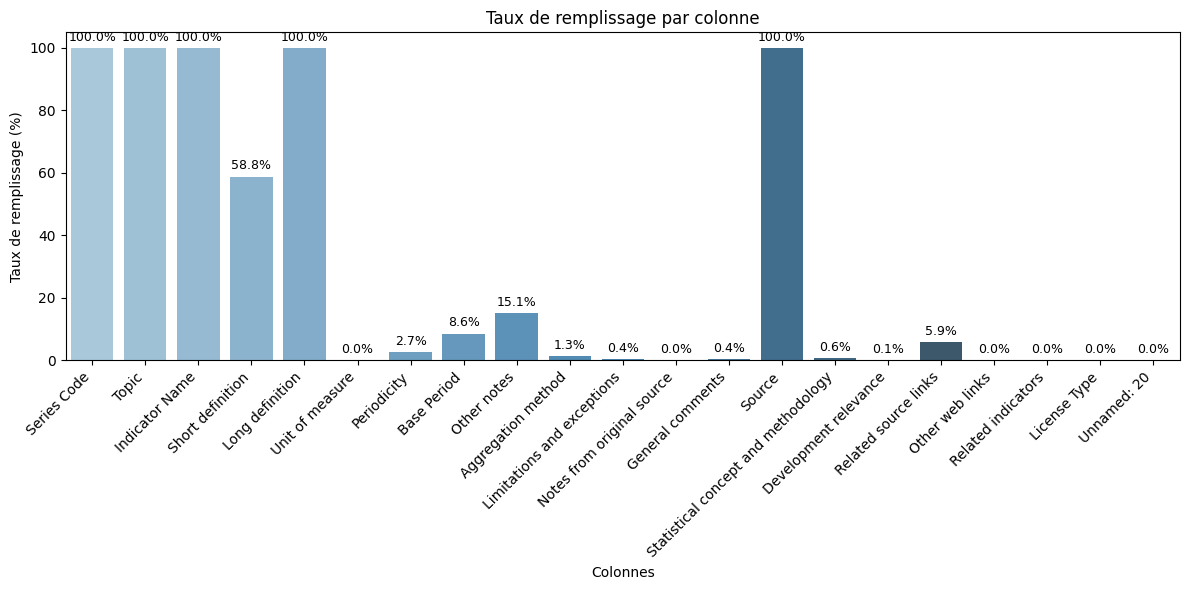

In [67]:
# 1. Calcul du taux de remplissage
taux = (ed_series.notna().mean() * 100).round(2)

# 2. Transformation en DataFrame pour seaborn
df_taux = taux.reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_taux,
    x='Colonne',
    y='TauxRemplissage',
    hue='Colonne',          
    palette='Blues_d',
    legend=False             
)

# Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Colonnes")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On peut prendre pour hypothèse que les colonnes remplies à moins de 60% ne contiennent pas assez de valeurs exploitables.

In [68]:
ed_series_clean = ed_series.loc[:, ed_series.notnull().mean() >= 0.6]

In [69]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [70]:
ed_series_clean.shape

(3665, 5)

Il n'y a plus que **5 colonnes** au lieu de **22**

In [71]:
ed_series_clean.describe().T

,count,unique,top,freq
Series Code,3665,3665,XGDP.56.FSGOV.FDINSTADM.FFD,1
Topic,3665,37,Learning Outcomes,1046
Indicator Name,3665,3665,Government expenditure in tertiary institution...,1
Long definition,3665,2060,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,215
Source,3665,31,UNESCO Institute for Statistics,1269


## Nettoyage du DF Country

In [72]:
country_filtered.shape

(241, 28)

In [73]:
country_filtered_info = country_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Country Name                                       241 non-null    object 
 2   Currency Unit                                      215 non-null    object 
 3   Special Notes                                      145 non-null    object 
 4   Region                                             214 non-null    object 
 5   Income Group                                       214 non-null    object 
 6   WB-2 code                                          240 non-null    object 
 7   National accounts base year                        205 non-null    object 
 8   National accounts reference year                   32 non-null     float64
 9   SNA price 

In [74]:
len(country_filtered['Country Code'])

241

In [75]:
valid_codes = [c.alpha_3 for c in pycountry.countries]

### Première méthode avec liste des payx inexistants

In [76]:
false_country = country_filtered[~country_filtered['Country Code'].isin(valid_codes)]['Country Code'].unique().tolist()
false_country_names = country_filtered[country_filtered['Country Code'].isin(false_country)][['Country Code', 'Country Name']]
false_country_names

,Country Code,Country Name
5,ARB,Arab World
35,CHI,Channel Islands
57,EAP,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only)
60,ECS,Europe & Central Asia (all income levels)
63,EMU,Euro area
68,EUU,European Union
89,HIC,High income
92,HPC,Heavily indebted poor countries (HIPC)


On remarque que des vrais Pays s'affiche dans cette liste. Nous devons donc leur réafecter leur bon code. ( Kosovo et Channel Islands)

In [77]:
# Dictionnaire de correction manuelle
corrections = {
    "XKX": "XK",
    "CHI": "GBR", 
}

# Appliquer les corrections dans country_clean
country_filtered['Country Code'] = country_filtered['Country Code'].replace(corrections)

# Liste complète des codes valides reconnus par pycountry
valid_codes = [c.alpha_3 for c in pycountry.countries]

# Supprimer les lignes qui ont un code toujours invalide après correction
country_clean = country_filtered[country_filtered['Country Code'].isin(valid_codes)]

codes_deleted = country_filtered[~country_filtered['Country Code'].isin(valid_codes)][['Country Code', 'Country Name']]
codes_deleted

,Country Code,Country Name
5,ARB,Arab World
57,EAP,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only)
60,ECS,Europe & Central Asia (all income levels)
63,EMU,Euro area
68,EUU,European Union
89,HIC,High income
92,HPC,Heavily indebted poor countries (HIPC)
116,LAC,Latin America & Caribbean (developing only)


In [78]:
country_clean.head(5)

,Country Code,Country Name,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [79]:
country_clean.shape

(215, 28)

### Deuxième méthode avec merge

In [80]:
### On crée un DF avec une colonne uniquem ' Country Code'
valid_codes_df = pd.DataFrame(valid_codes, columns=['Country Code'])

In [81]:
### On merge les DF country_filtered & valid_codes_df avec 'inner' = on ne garde que les lignes de country_filtered 
### dont le 'Country Code' est présent dans le DF valid_codes_df
country_clean_v2 = country_filtered.merge(valid_codes_df, on='Country Code', how='inner')


In [82]:
country_clean_v2.shape

(215, 28)

### Vérification

In [83]:
## On crée 2 nouveaux DF, partant de country_clean & country_clean_v2, en triant toutes les colonnes 
### par ordre alphabétique & ordre croissant des valeurs, & on réinitialise les index.
country_clean_sorted = country_clean.sort_values(by=country_clean.columns.tolist()).reset_index(drop=True)
country_clean_v2_sorted = country_clean_v2.sort_values(by=country_clean_v2.columns.tolist()).reset_index(drop=True)

### On utilise la fonction equals pour voir si les DF sont identiques : renvoie TRUE si vrai, FALSE si faux
country_clean_sorted.equals(country_clean_v2_sorted)


True

**Les deux dataframes sont bien identiques**

## Indicateurs à supprimer

Pour trouver quels indicateurs sont à supprimer, nous allons partir de **ed_series_clean**, qui contient les **Series Codes** et les **Topic** et **ed_data_clean** qui contient les **Indicator Code** et **Indicator Name**, et **country_clean** qui nous donne les informations générales sur les pays.

In [84]:
ed_series_clean = ed_series_clean.copy()
ed_data_clean = ed_data.copy()
country_clean = country_clean.copy()

In [85]:
country_clean.sort_values(by='Latest population census', ascending=True).head(5)

,Country Code,Country Name,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
2,AGO,Angola,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
118,LBN,Lebanon,Lebanese pound,NaN,Middle East & North Africa,Upper middle income,LB,1997,NaN,Value added at basic prices (VAB),...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Multiple Indicator Cluster Survey (MICS), 2000",NaN,Yes,2011,2007.0,2012.0,2005
1,AFG,Afghanistan,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
147,MMR,Myanmar,Myanmar kyat,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,Low income,MM,2005/06,NaN,Value added at producer prices (VAP),...,Consolidated central government,General Data Dissemination System (GDDS),1983,"Multiple Indicator Cluster Survey (MICS), 2009/10",NaN,NaN,2010,2003.0,2010.0,2000
40,COD,Dem. Rep. Congo,Congolese franc,"Based on INS (2000-09) and IMF (2010-13) data,...",Sub-Saharan Africa,Low income,ZR,2005,NaN,Value added at basic prices (VAB),...,Consolidated central government,General Data Dissemination System (GDDS),1984,"Demographic and Health Survey (DHS), 2013","1-2-3 survey (1-2-3), 2004/05",NaN,NaN,NaN,NaN,2005


### Colonnes à supprimer

In [86]:
country_clean.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'WB-2 code', 'National accounts base year',
       'National accounts reference year', 'SNA price valuation',
       'Lending category', 'Other groups', 'System of National Accounts',
       'Alternative conversion factor', 'PPP survey year',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard', 'Latest population census',
       'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data'],
      dtype='object')

Certaines de ces colonnes ont peu d'intêret pour notre etude.

In [87]:
useless_columns_country = [
    'WB-2 code', 'National accounts base year', 'National accounts reference year',
    'SNA price valuation', 'Other groups', 'System of National Accounts',
    'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use',
    'External debt Reporting status', 'System of trade', 'Government Accounting concept',
    'IMF data dissemination standard', 'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census', 'Latest industrial data',
    'Latest trade data', 'Latest water withdrawal data'
]


In [88]:
country_filtered = country_clean.drop(useless_columns_country , axis=1)

In [89]:
country_filtered.columns

Index(['Country Code', 'Country Name', 'Currency Unit', 'Special Notes',
       'Region', 'Income Group', 'Lending category',
       'Latest population census', 'Latest household survey'],
      dtype='object')

In [90]:
ed_series_clean.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition', 'Source'], dtype='object')

In [91]:
ed_data_clean.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

On peut créer un nouveau DF qui contient les colonnes **Country Name**, **Country Code**, **Indicator Code** , **Indicator Name** ainsi que toutes les années.

### Nouveau DF de travail

In [92]:
df_indicators = ed_series_clean[['Indicator Name', 'Topic']].merge(ed_data_clean, on='Indicator Name', how='left')
df_indicators = country_filtered[['Country Code', 'Country Name','Region', 'Income Group', 'Latest population census']].merge(df_indicators, on=['Country Code', 'Country Name'], how='inner')
df_indicators

,Country Code,Country Name,Region,Income Group,Latest population census,Indicator Name,Topic,Indicator Code,1970,1971,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Barro-Lee: Percentage of female population age...,Attainment,BAR.NOED.1519.FE.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Barro-Lee: Percentage of population age 15-19 ...,Attainment,BAR.NOED.1519.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Barro-Lee: Percentage of female population age...,Attainment,BAR.NOED.15UP.FE.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Barro-Lee: Percentage of population age 15+ wi...,Attainment,BAR.NOED.15UP.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Barro-Lee: Percentage of female population age...,Attainment,BAR.NOED.2024.FE.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624580,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Government expenditure per upper secondary stu...,Expenditures,UIS.XUNIT.USCONST.3.FSGOV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624581,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Government expenditure per post-secondary non-...,Expenditures,UIS.XUNIT.USCONST.4.FSGOV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624582,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Government expenditure per tertiary student (c...,Expenditures,UIS.XUNIT.USCONST.56.FSGOV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624583,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Government expenditure in secondary institutio...,Expenditures,XGDP.23.FSGOV.FDINSTADM.FFD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_indicators.shape

(624585, 73)

Nous avons vu lors du nettoyage du **DF Country** que certains pays inexistants étaient dans la liste des **Country Code**. Il faut donc les enlever

In [94]:
df_indicators.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')

### Les années à étudier

### Matrice de Corrélation

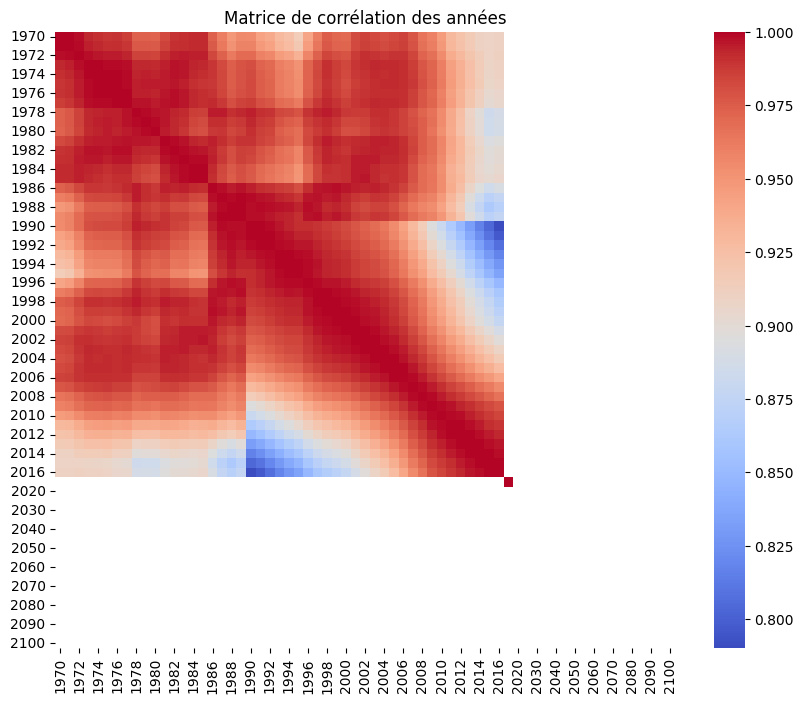

In [95]:
# Étape 1 : Sélectionner les colonnes numériques
years = df_indicators.select_dtypes(include='number')

# Étape 4 : Calculer la matrice de corrélation
years_correlation_matrix = years.corr(method='pearson')

# Étape 5 : Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(years_correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des années")
plt.show()

Plus les années sont proches temporellement, plus l'indice de corrélation est fort.  
On peut noter également que pour les années **~>2020** les indices sont plus faibles : c'est normal, ce sont des projections.

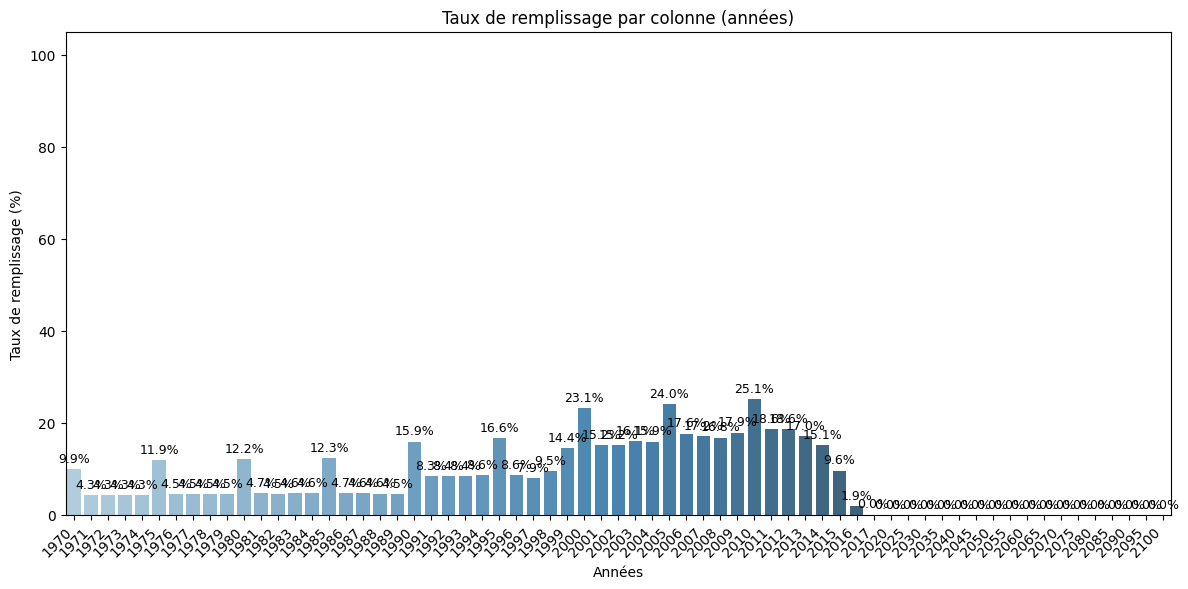

In [96]:
# 1.On garde les colonnes dans df_indicators qui sont des nombres , dans notre cas, il n'y a que les années
years_cols = [col for col in df_indicators.columns if col.isdigit()]

# 2. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_indicators[years_cols].notna().mean()

# 3. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 4. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')

### Afficher le taux au-dessus de chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

faire un bfi

Les années après **2016** sont peu remplies : c'est normal, ce sont des projections sur l'avenir. L'intégralité des indicateurs ne peut pas avoir de valeurs.
idem pour les valeurs avant **1990**

### Séparation des années en deux : les années passées et les années futures

In [97]:
# 1. Construire la liste des années à supprimer : celles < 1990 et celles > 2040
years_passed = list(np.arange(1970, 2017))
years_futur = list(np.arange(2017, 2101))


# 2. Convertir ces années en chaînes
years_passed = [str(year) for year in years_passed]
years_futur = [str(year) for year in years_futur]

## Les colonnes du DF sont des chaînes. On transforme donc chaque année de la liste crée en chaîne de caractères.

# 3. Filtrer les colonnes à supprimer 
cols_to_keep_futur = [col for col in df_indicators.columns if not col.isdigit() or col not in years_passed]
cols_to_keep_passed = [col for col in df_indicators.columns if not col.isdigit() or col not in years_futur]

## On garde : les colonnes non numériques (col if not col.isdigit()
## Pour ces colonnes on garde les colonnes non présentes dans la liste years_to_delete_str

# 4. Créer un nouveau DataFrame avec ces colonnes
df_indicators_futur = df_indicators[cols_to_keep_futur]
df_indicators_passed = df_indicators[cols_to_keep_passed]


## Les années de 1970 à 2016

#### Filtre sur les Topic

Mark veut étendre *academy* , un site de formation en ligne pour les lycéens et  +.  
Il y a plusieurs types de Topic à regarder :  
- Population du pays
- Richesse du pays
- Accès à Internet
- L'éducation

Prouver le choix de chaque Topic. Rajouter Roleplay ou enlever Education Equality.  Regarder si les gens sont riches.  Avoir accès a internet. taille de la population visée. (1 truc d'éducation, 1 truc d'argent, internet, 1 truc de population)  
topic d'éducation = comment choisir ? les 3 autres ok pour commencer.
puis après topic d'éducation.
Si 4 indicateurs : comment choisir l'indicateur == le plus rempli.

In [98]:
df_indicators_passed= df_indicators_passed.rename(columns={'Country Name_x': 'Country Name'})

In [99]:
topic_list = df_indicators_passed['Topic'].unique().tolist()
topic_list

['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Social Protection & Labor: Labor force structure',
 'Population',
 'Health: Population: Dynamics',
 'Health: Population: Structure',
 'EMIS',
 'Post-Secondary/Non-Tertiary']

### Topic à étudier

In [100]:
topics_to_keep = [
    'Population',
    'Infrastructure: Communications',
    'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
    'Tertiary'
]

Regardons maintenant le taux de remplissage de chaque topic

In [101]:
# 2. Filtrer les lignes du DataFrame df_indicators contenant ces topics
df_filtered_topics = df_indicators_passed[df_indicators_passed['Topic'].isin(topics_to_keep)]


# 4. Calculer le taux de remplissage (valeurs non manquantes) par Topic
taux_par_topic = df_filtered_topics.groupby('Topic')[years_passed].apply(lambda x: x.notna().mean().mean() * 100).round(2)

# 5. Transformer en DataFrame pour affichage clair
df_taux = taux_par_topic.reset_index()
df_taux.columns = ['Topic', 'Taux de remplissage (%)']
df_taux

,Topic,Taux de remplissage (%)
0,Economic Policy & Debt: National accounts: Atl...,73.80
1,Infrastructure: Communications,36.19
2,Population,53.69
3,Tertiary,15.48


Au vu des taux de remplissage par **Topic** , on peut penser que certaines années sont vides.

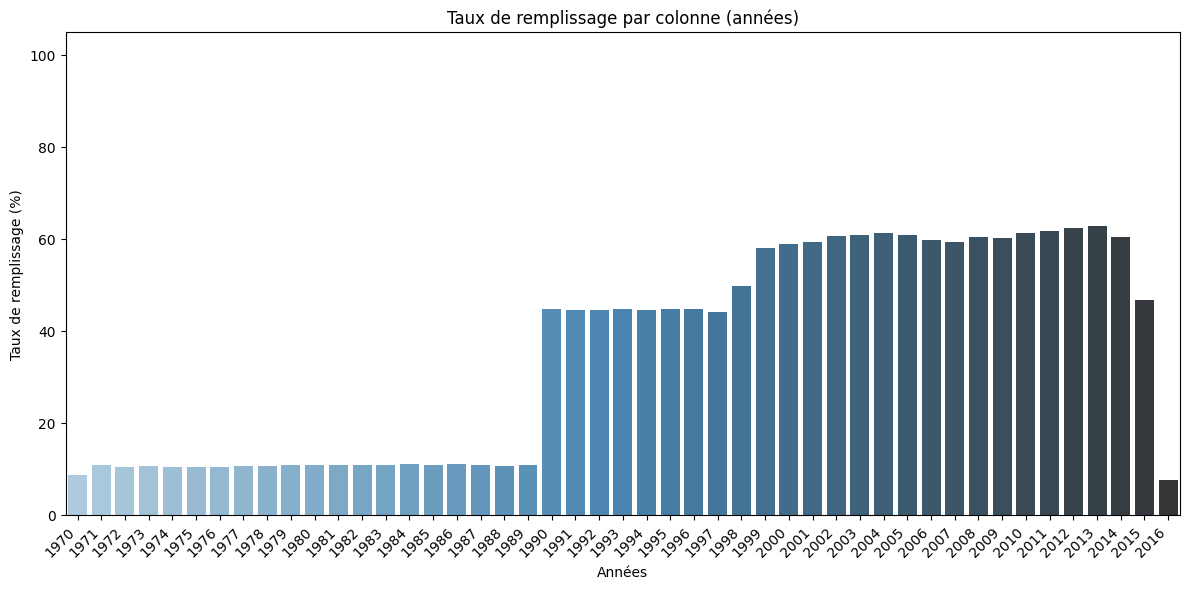

In [102]:
# 1. Calculer la proportion de valeurs non manquantes par année
years_proportion_completed = df_filtered_topics[years_passed].notna().mean()

# 2. Transformation en DataFrame pour seaborn
df_taux = (years_proportion_completed * 100).round(2).reset_index()
df_taux.columns = ['Colonne', 'TauxRemplissage']

# 3. Affichage
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_taux, x='Colonne', y='TauxRemplissage', hue='Colonne', palette='Blues_d')


plt.title("Taux de remplissage par colonne (années)")
plt.ylabel("Taux de remplissage (%)")
plt.xlabel("Années")
plt.ylim(0, 105)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque que les années avant 1990 sont peu remplis. Regardons en détail chacun des Topic pour voir quels pays n'ont pas beaucoup de données.

In [103]:
df_bfilled = df_filtered_topics.copy()
df_bfilled = df_bfilled.bfill(axis=1)
df_bfilled

,Country Code,Country Name,Region,Income Group,Latest population census,Indicator Name,Topic,Indicator Code,1970,1971,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
610,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Personal computers (per 100 people),Infrastructure: Communications,IT.CMP.PCMP.P2,7.923544,7.923544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Internet users (per 100 people),Infrastructure: Communications,IT.NET.USER.P2,0.0,0.0,...,30.9,52.0,58.0,62.0,69.0,74.0,78.9,83.78,88.661227,93.542454
1621,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,"Gross enrolment ratio, tertiary, gender parity...",Tertiary,SE.ENR.TERT.FM.ZS,1.15581,1.15581,...,1.36268,1.37218,1.43284,1.41239,1.4993,1.49501,2.20461,2.27149,2.26302,NaN
1898,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,"School life expectancy, primary to tertiary, b...",Tertiary,SE.SCH.LIFE,13.31709,13.31709,...,13.84833,13.37449,13.53759,13.47921,13.25562,13.69028,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624465,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Percentage of all students in tertiary educati...,Tertiary,UIS.TEP.8,0.00425,0.00425,...,0.00425,0.00425,0.00425,0.00425,0.00425,0.00425,0.00425,NaN,NaN,NaN
624466,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Percentage of female students in tertiary educ...,Tertiary,UIS.TEP.8.F,0.0023,0.0023,...,0.0023,0.0023,0.0023,0.0023,0.0023,0.0023,0.0023,NaN,NaN,NaN
624467,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Percentage of male students in tertiary educat...,Tertiary,UIS.TEP.8.M,0.00593,0.00593,...,0.00593,0.00593,0.00593,0.00593,0.00593,0.00593,0.00593,NaN,NaN,NaN
624470,ZWE,Zimbabwe,Sub-Saharan Africa,Low income,2012,Official entrance age to post-secondary non-te...,Tertiary,UIS.THAGE.4.A.GPV,17.0,17.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0


## Indicateurs du Topic 'Popuplation'

In [104]:
topic_population = df_filtered_topics[df_filtered_topics['Topic'] == 'Population']
topic_population.columns

Index(['Country Code', 'Country Name', 'Region', 'Income Group',
       'Latest population census', 'Indicator Name', 'Topic', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [105]:
indicator_population_list = topic_population['Indicator Name'].unique()
indicator_population_list

array(['Population, ages 3-5, female', 'Population, ages 3-5, male',
       'Population, ages 3-5, total', 'Population, ages 4-6, female',
       'Population, ages 4-6, male', 'Population, ages 4-6, total',
       'Population, ages 5-9, female', 'Population, ages 5-9, male',
       'Population, ages 5-9, total', 'Population, ages 5-10, female',
       'Population, ages 5-10, male', 'Population, ages 5-10, total',
       'Population, ages 5-11, female', 'Population, ages 5-11, male',
       'Population, ages 5-11, total', 'Population, ages 6-9, female',
       'Population, ages 6-9, male', 'Population, ages 6-9, total',
       'Population, ages 6-10, female', 'Population, ages 6-10, male',
       'Population, ages 6-10, total', 'Population, ages 6-11, female',
       'Population, ages 6-11, male', 'Population, ages 6-11, total',
       'Population, ages 6-12, female', 'Population, ages 6-12, male',
       'Population, ages 6-12, total', 'Population, ages 7-9, female',
       'Population

Pour savoir quel indicateurs choisir, regardons les 20 indicateurs ayant le plus de pays où l'on a des données.

In [106]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = topic_population['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
topic_population = topic_population[~mask]
indicators_pop = topic_population['Indicator Name']
indicators_pop

2001                            Population, ages 3-5, total
2004                            Population, ages 4-6, total
2007                            Population, ages 5-9, total
2010                           Population, ages 5-10, total
2013                           Population, ages 5-11, total
                                ...                        
623534    Population of the official age for tertiary ed...
624387    Population of the official entrance age to pri...
624390    Population of the official entrance age to sec...
624393    Population of the official age for post-second...
624396    Population of compulsory school age, both sexe...
Name: Indicator Name, Length: 8775, dtype: object

In [107]:
df_bfilled_pop = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_pop)]

In [108]:
df_bfilled_pop.groupby('Indicator Name').count()['1970'].sort_values(ascending=False).head(50)

Indicator Name
Population of the official age for tertiary education, both sexes (number)                       184
Population of the official age for primary education, both sexes (number)                        183
Population of the official age for pre-primary education, both sexes (number)                    183
Population of the official age for secondary education, both sexes (number)                      183
Population of the official age for lower secondary education, both sexes (number)                183
Population of the official entrance age to primary education, both sexes (number)                183
Population of the official entrance age to secondary general education, both sexes (number)      183
Population of the official age for the last grade of primary education, both sexes (number)      183
Population of the official age for upper secondary education, both sexes (number)                183
Population, ages 10-14, total                                               

In [109]:
# 1. Copie du DF de base avant de faire un bfill
df_topic_pop= topic_population.copy()
df_topic_pop = df_topic_pop[df_topic_pop['Indicator Name'].isin(indicator_population_list)]

In [110]:
# 1. Repartir du DataFrame source (par ex. topic_population)
df_topic_pop  = df_topic_pop.copy()

# 2. Colonnes années
years_cols = [col for col in df_topic_pop.columns if col.isdigit()]

# 3. Calcul du taux de remplissage par indicateur
taux_remplissage = (
    df_topic_pop 
    .groupby('Indicator Name')[years_cols]
    .apply(lambda x: x.notna().sum().sum() / x.size * 100)
    .round(2)
    .sort_values(ascending=False)
)

# 4. Transformation en DataFrame
df_taux_indicateur = taux_remplissage.reset_index()
df_taux_indicateur.columns = ['Indicator Name', 'Taux remplissage (%)']

# 5. Affichage des 10 premiers indicateurs les mieux remplis
df_taux_indicateur.head(20)

,Indicator Name,Taux remplissage (%)
0,Population of the official age for pre-primary...,89.08
1,Population of the official age for upper secon...,88.90
2,Population of the official age for lower secon...,88.88
3,Population of the official age for secondary e...,88.85
4,Population of the official entrance age to sec...,88.84
5,Population of the official entrance age to pri...,88.59
6,Population of the official age for primary edu...,88.37
7,Population of the official age for the last gr...,87.91
8,Population of the official age for tertiary ed...,85.84
9,"Population, ages 10-14, total",47.70


Les indicateurs qui différencient les hommes des femmes ne sont pas utiles dans notre cas. Nous pouvons donc déjà les supprimer

In [111]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = df_topic_pop['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
df_topic_pop  = df_topic_pop[~mask]

In [112]:
# 3. Calcul du taux de remplissage par indicateur
taux_remplissage = (
    df_topic_pop
    .groupby('Indicator Name')[years_cols]
    .apply(lambda x: x.notna().sum().sum() / x.size * 100)
    .round(2)
    .sort_values(ascending=False)
)

# 4. Transformation en DataFrame
df_taux_indicateur = taux_remplissage.reset_index()
df_taux_indicateur.columns = ['Indicator Name', 'Taux remplissage (%)']

# 5. Affichage des 10 premiers indicateurs les mieux remplis
df_taux_indicateur.head(20)

,Indicator Name,Taux remplissage (%)
0,Population of the official age for pre-primary...,89.08
1,Population of the official age for upper secon...,88.90
2,Population of the official age for lower secon...,88.88
3,Population of the official age for secondary e...,88.85
4,Population of the official entrance age to sec...,88.84
5,Population of the official entrance age to pri...,88.59
6,Population of the official age for primary edu...,88.37
7,Population of the official age for the last gr...,87.91
8,Population of the official age for tertiary ed...,85.84
9,"Population, ages 10-14, total",47.70


Comme le projet de Mark concerne les personnes étant au lycée ou +, on peut supprimer les indicateurs qui concernent les populations ayant des niveaux d'éducation plus faibles.

Au vu du projet de Mark, concentrons nous sur les indicateurs suivant: **Population of the official age for tertiary education, both sexes (number)**, **Population of the official age for secondary education, both sexes (number)** et **Population of the official age for upper secondary education, both sexes (number)**

Population of the official age for tertiary education, both sexes (number)  
➤ Nombre de jeunes dans la tranche d’âge correspondant à l’enseignement supérieur (ex. 18–22 ans selon les pays).  
➤ 🔹 Permet d’estimer la taille du public directement visé par les formations supérieures en ligne.  

Population of the official age for secondary education, both sexes (number)  
➤ Nombre total de jeunes en âge d’être scolarisés au niveau secondaire (collège + lycée).  
➤ 🔹 Sert à anticiper la demande future de formation post-secondaire, et évaluer les dynamiques démographiques.  

Population of the official age for upper secondary education, both sexes (number)  
➤ Population du secondaire supérieur uniquement (souvent les 15–17 ans).  
➤ 🔹 Indique le vivier potentiel pour des programmes préparatoires à l’université ou des certifications ciblées en ligne.  

In [113]:
indicators_population_to_keep = [
 'Population of the official age for secondary education, both sexes (number)',
 'Population of the official age for upper secondary education, both sexes (number)',
 'Population of the official age for tertiary education, both sexes (number)'
]

In [114]:
# 1. Filtrer pour ne garder que les indicateurs que l'on souhaite
df_subset = df_topic_pop[df_topic_pop['Indicator Name'].isin(indicators_population_to_keep)]

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Population of the official age for secondary education, both sexes (number)",88.72,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,...,91.28,91.28,91.79,90.77,90.77,90.77,90.77,91.28,90.77,73.85
"Population of the official age for tertiary education, both sexes (number)",89.23,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,...,90.26,90.26,90.77,89.23,81.03,78.46,75.90,90.77,60.00,3.59
"Population of the official age for upper secondary education, both sexes (number)",88.72,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,88.21,...,91.28,91.28,91.79,91.28,91.28,91.28,91.28,91.79,90.77,73.85


In [115]:
# 1. Copie du DF de base avant de faire un bfill
df_indicators_selected = topic_population.copy()
df_topic_pop = df_indicators_selected[df_indicators_selected['Indicator Name'].isin(indicators_population_to_keep)]

In [116]:
df_bfill_population = df_topic_pop.copy()
df_bfill_population = df_topic_pop.bfill(axis=1)

In [117]:
df_topic_pop_1=df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for secondary education, both sexes (number)']
df_topic_pop_1.count()

Country Code                195
Country Name                195
Region                      193
Income Group                193
Latest population census    193
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        173
1971                        172
1972                        172
1973                        172
1974                        172
1975                        172
1976                        172
1977                        172
1978                        172
1979                        172
1980                        172
1981                        172
1982                        172
1983                        172
1984                        172
1985                        172
1986                        172
1987                        172
1988                        172
1989                        172
1990                        172
1991                        172
1992                        172
1993    

In [118]:
df_topic_pop_2=df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)']
df_topic_pop_2.count()

Country Code                195
Country Name                195
Region                      193
Income Group                193
Latest population census    193
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        173
1971                        172
1972                        172
1973                        172
1974                        172
1975                        172
1976                        172
1977                        172
1978                        172
1979                        172
1980                        172
1981                        172
1982                        172
1983                        172
1984                        172
1985                        172
1986                        172
1987                        172
1988                        172
1989                        172
1990                        172
1991                        172
1992                        172
1993    

In [119]:
df_topic_pop_3=df_topic_pop[df_topic_pop['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)']
df_topic_pop_3.count()

Country Code                195
Country Name                195
Region                      193
Income Group                193
Latest population census    193
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        174
1971                        172
1972                        172
1973                        172
1974                        172
1975                        172
1976                        172
1977                        172
1978                        172
1979                        172
1980                        172
1981                        172
1982                        172
1983                        172
1984                        172
1985                        172
1986                        172
1987                        172
1988                        172
1989                        172
1990                        172
1991                        172
1992                        172
1993    

### Comparaison des 3 indicateurs liés à la Population

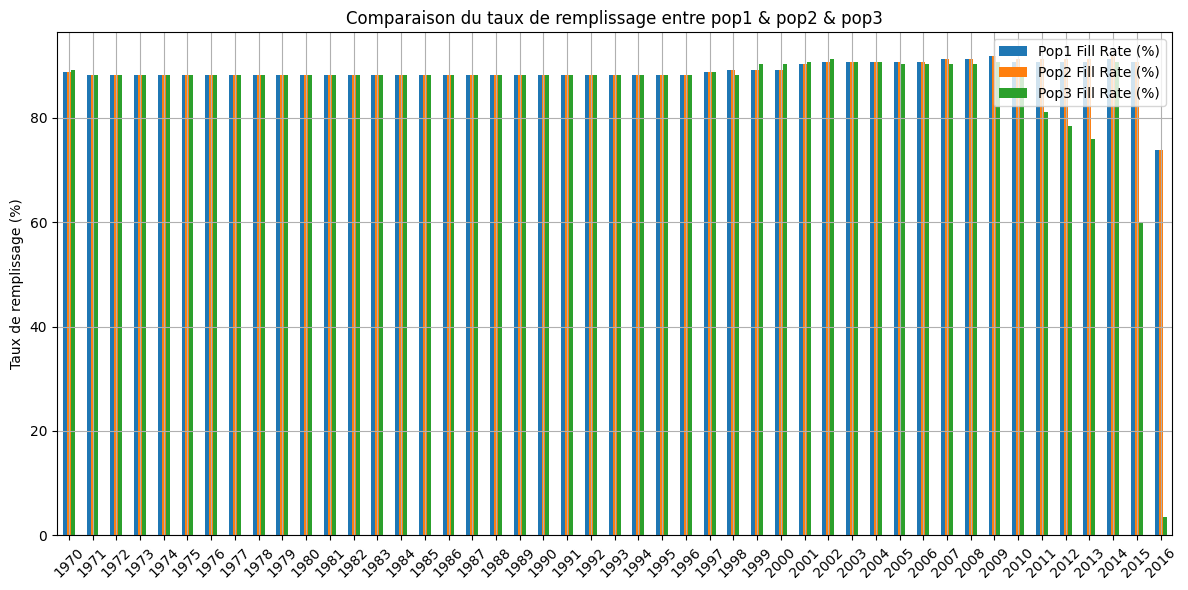

In [120]:
cols_to_drop_pop1 = ['Country Name', 'Country Code', 'Region','Income Group', 'Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']
df_topic_pop1_comparison = df_topic_pop_1.copy()
df_topic_pop1_comparison  = df_topic_pop1_comparison.drop(columns = cols_to_drop_pop1)

cols_to_drop_pop2 = ['Country Code', 'Country Name', 'Income Group', 'Region','Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']
df_topic_pop2_comparison = df_topic_pop_2.copy()
df_topic_pop2_comparison = df_topic_pop2_comparison.drop(columns = cols_to_drop_pop2)

cols_to_drop_pop3 = ['Country Code', 'Country Name', 'Income Group', 'Region','Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']
df_topic_pop3_comparison = df_topic_pop_3.copy()
df_topic_pop3_comparison = df_topic_pop3_comparison.drop(columns = cols_to_drop_pop3)

fill_rate_pop1 = df_topic_pop1_comparison.notna().mean() * 100
fill_rate_pop2 = df_topic_pop2_comparison.notna().mean() * 100
fill_rate_pop3 = df_topic_pop3_comparison.notna().mean() * 100
fill_rate_comparison = pd.DataFrame({
    'Pop1 Fill Rate (%)': fill_rate_pop1,
    'Pop2 Fill Rate (%)': fill_rate_pop2,
    'Pop3 Fill Rate (%)': fill_rate_pop3,
})


fill_rate_comparison[['Pop1 Fill Rate (%)', 'Pop2 Fill Rate (%)', 'Pop3 Fill Rate (%)']].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Taux de remplissage (%)')
plt.title('Comparaison du taux de remplissage entre pop1 & pop2 & pop3')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

L'indicateur **secondary education** comprend les collégiens & lycéens, tandis que **upper secondary** concerne uniquement les lycéens. On va donc le choisir comme indicateur pour la population. Le topic étant lié à **tertiary** a trops de valeurs manquantes vis à vis des deux autres.

In [121]:
indic_to_keep = ['Population of the official age for upper secondary education, both sexes (number)']
df_topic_pop = df_topic_pop[
    df_topic_pop['Indicator Name'].isin(indic_to_keep)
]


## Indicateurs du Topic 'Infrastructure: Communications'

In [122]:
topic_infra = df_filtered_topics[df_filtered_topics['Topic'] == 'Infrastructure: Communications']
indicators_infra_list = topic_infra['Indicator Name'].unique().tolist()
indicators_infra_list

['Personal computers (per 100 people)', 'Internet users (per 100 people)']

In [123]:
# 1. Filtrer pour ne garder que les indicateurs que l'on souhaite
df_subset = topic_infra[topic_infra['Indicator Name'].isin(indicators_infra_list)]

# 2. Calcul du taux de remplissage (% de pays non-NaN) par indicateur et par année
taux_filled_by_year = df_subset.groupby('Indicator Name')[years_passed].apply(
    lambda x: x.notna().mean() * 100
).round(2)

# 3. Résultat : un DataFrame avec les années en colonnes et un % par indicateur
taux_filled_by_year.head()


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Internet users (per 100 people),3.59,0.0,0.0,0.0,0.0,3.59,3.59,3.59,3.59,3.59,...,95.38,94.87,94.36,94.36,95.38,94.36,94.36,94.36,94.36,94.36
Personal computers (per 100 people),0.51,0.0,0.0,0.0,0.0,0.51,0.51,0.51,0.51,0.51,...,22.56,13.33,1.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [124]:
df_bfilled_infra = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_infra_list)]

#### Posession de PC

In [125]:
df_infra_pc = topic_infra[topic_infra['Indicator Name'] == 'Personal computers (per 100 people)'].copy()
df_bfilled_infra_pc = df_bfilled_infra[df_bfilled_infra['Indicator Name'] == 'Personal computers (per 100 people)']
df_bfilled_infra_pc.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        176
1971                        176
1972                        176
1973                        176
1974                        176
1975                        176
1976                        176
1977                        176
1978                        176
1979                        176
1980                        176
1981                        176
1982                        176
1983                        176
1984                        176
1985                        176
1986                        176
1987                        176
1988                        176
1989                        176
1990                        176
1991                        176
1992                        176
1993    

#### Usage d'internet

In [126]:
df_bfilled_infra_web = df_bfilled_infra[df_bfilled_infra['Indicator Name'] == "Internet users (per 100 people)"]
df_bfilled_infra_web.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        190
1971                        190
1972                        190
1973                        190
1974                        190
1975                        190
1976                        190
1977                        190
1978                        190
1979                        190
1980                        190
1981                        190
1982                        190
1983                        190
1984                        190
1985                        190
1986                        190
1987                        190
1988                        190
1989                        190
1990                        190
1991                        187
1992                        187
1993    

In [127]:
# 1. Filtrer les données pour l'indicateur
df_infra_web = topic_infra[topic_infra['Indicator Name'] == "Internet users (per 100 people)"].copy()

# 2. Création d'un nouveau df avec bfill
df_bfilled_web = df_infra_web.bfill(axis=1)
df_bfilled_web.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        190
1971                        190
1972                        190
1973                        190
1974                        190
1975                        190
1976                        190
1977                        190
1978                        190
1979                        190
1980                        190
1981                        190
1982                        190
1983                        190
1984                        190
1985                        190
1986                        190
1987                        190
1988                        190
1989                        190
1990                        190
1991                        187
1992                        187
1993    

### Comparaison des deux indicateurs

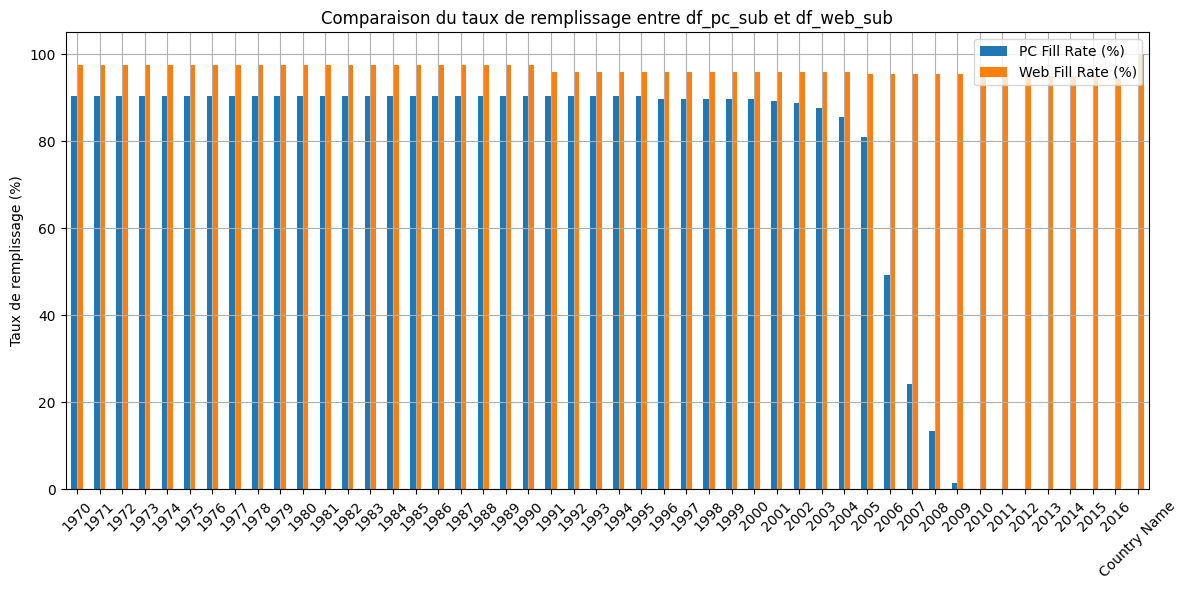

In [128]:
cols_to_drop_pc = ['Country Name', 'Country Code', 'Region','Income Group', 'Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']
df_infra_pc_comparison = df_bfilled_infra_pc.copy()
df_infra_pc_comparison= df_infra_pc_comparison.drop(columns = cols_to_drop_pc)
cols_to_drop_web = ['Country Code', 'Income Group', 'Region','Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']

df_infra_web_comparison = df_bfilled_web.copy()
df_infra_web_comparison= df_infra_web_comparison.drop(columns = cols_to_drop_web)                       
fill_rate_pc = df_infra_pc_comparison.notna().mean() * 100
fill_rate_web = df_infra_web_comparison.notna().mean() * 100

fill_rate_comparison = pd.DataFrame({
    'PC Fill Rate (%)': fill_rate_pc,
    'Web Fill Rate (%)': fill_rate_web
})


fill_rate_comparison[['PC Fill Rate (%)', 'Web Fill Rate (%)']].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Taux de remplissage (%)')
plt.title('Comparaison du taux de remplissage entre df_pc_sub et df_web_sub')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Vu le graphique, on peut conclure que le nombre d'usager d'Internet est mieux rempli, et plus intéressant que le nombre de personne possédant un PC. ( comme nous l'avons vu précédement, l'année 1990 ne doit pas être prise en compte)

Mettons à jour le DF de base avec l'indicateur choisi

In [129]:
indicator_to_keep = ['Internet users (per 100 people)']
df_topic_infra = topic_infra[
    topic_infra['Indicator Name'].isin(indicator_to_keep)
]

## Topic Economique

In [130]:
topic_economic = df_filtered_topics[df_filtered_topics['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
indicators_economic_list = topic_economic['Indicator Name'].unique().tolist()
indicators_economic_list

['GNI per capita, Atlas method (current US$)']

In [131]:
# 1. Filtrer les données pour l'indicateur
df_topic_eco = df_filtered_topics[df_filtered_topics['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'].copy()
df_topic_eco.drop(columns = 'Country Code').head(5)

,Country Name,Region,Income Group,Latest population census,Indicator Name,Topic,Indicator Code,1970,1971,1972,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1621,Aruba,Latin America & Caribbean,High income: nonOECD,2010,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4824,Afghanistan,South Asia,Low income,1979,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,NaN,...,330.0,360.0,460.0,500.0,560.0,670.0,670.0,630.0,590.0,570.0
8027,Angola,Sub-Saharan Africa,Upper middle income,1970,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,NaN,...,2160.0,2760.0,3190.0,3240.0,3390.0,3820.0,4350.0,4470.0,4040.0,3450.0
11230,Albania,Europe & Central Asia,Upper middle income,2011,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,NaN,...,3480.0,3950.0,4230.0,4360.0,4410.0,4360.0,4480.0,4440.0,4290.0,4180.0
14433,Andorra,Europe & Central Asia,High income: nonOECD,2011. Population figures compiled from adminis...,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# 2. Création d'un nouveau df avec bfill
df_bfilled_eco = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_economic_list)]
df_bfilled_eco.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        182
1971                        182
1972                        182
1973                        182
1974                        182
1975                        182
1976                        182
1977                        182
1978                        182
1979                        182
1980                        182
1981                        182
1982                        182
1983                        182
1984                        182
1985                        182
1986                        182
1987                        182
1988                        182
1989                        182
1990                        182
1991                        182
1992                        182
1993    

Le topic n'ayant qu'un seul indicateur, notre étude globale se fera avec lui.

## Indicateurs du Topic 'Tertiary'

In [133]:
df_topic_tertiary = df_filtered_topics[df_filtered_topics['Topic'] == 'Tertiary']

In [134]:
indicator_tertiary_list = df_topic_tertiary['Indicator Name'].unique()
indicator_tertiary_list

array(['Gross enrolment ratio, tertiary, gender parity index (GPI)',
       'School life expectancy, primary to tertiary, both sexes (years)',
       'School life expectancy, primary to tertiary, female (years)',
       'School life expectancy, primary to tertiary, male (years)',
       'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, female (%)',
       'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, male (%)',
       'Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)',
       'Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in tertiary education, all programmes, female (number)',
       'Percentage of students in tertiary education who are female (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Gross enrolment ratio, tertiary, female (%)',
       'Gross enrolment ratio, tertiary, 

Au vu du projet de Mark, il n'y a pas d'intêret à garder les indicateurs qui séparent les hommes et les femmes.

In [135]:
# 1. Création d'un mask : on veut supprimer les lignes contenant 'male' ou 'female'
mask = df_topic_tertiary['Indicator Name'].str.contains('male|female', case=False, na=False)
# 2. On crée un nouveau DF où l'on enlève le mask précédemment crée
df_topic_tertiary = df_topic_tertiary[~mask]
indicators_tertiary = df_topic_tertiary['Indicator Name']
indicators_tertiary

1834      Gross enrolment ratio, tertiary, gender parity...
1898      School life expectancy, primary to tertiary, b...
1945      Gross graduation ratio from first degree progr...
1946      Enrolment in tertiary education, all programme...
1949        Gross enrolment ratio, tertiary, both sexes (%)
                                ...                        
624459    Percentage of all students in tertiary educati...
624462    Percentage of all students in tertiary educati...
624465    Percentage of all students in tertiary educati...
624470    Official entrance age to post-secondary non-te...
624472    Theoretical duration of post-secondary non-ter...
Name: Indicator Name, Length: 10725, dtype: object

In [136]:
df_bfilled_ter = df_bfilled[df_bfilled['Indicator Name'].isin(indicators_tertiary)]

In [137]:
df_bfilled_ter.groupby('Indicator Name').count()['1970'].sort_values(ascending=False).head(20)

Indicator Name
Enrolment in tertiary education, all programmes, both sexes (number)                                           184
Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)    182
Graduates from tertiary education, both sexes (number)                                                         178
Gross outbound enrolment ratio, all regions, both sexes (%)                                                    178
Gross enrolment ratio, primary to tertiary, both sexes (%)                                                     177
School life expectancy, primary to tertiary, both sexes (years)                                                177
Gross enrolment ratio, tertiary, both sexes (%)                                                                176
School life expectancy, primary to tertiary, gender parity index (GPI)                                         176
School life expectancy, tertiary, both sexes (years)             

Au vu du projet de Mark, concentrons nous sur les indicateurs suivant:  
Gross enrolment ratio, tertiary, both sexes (%)  
➤ Mesure l'accès à l'enseignement supérieur dans un pays.  
➤ 🔹 Essentiel pour estimer la taille du marché potentiel.  

Graduates from tertiary education, both sexes (number)  
➤ Reflète la capacité d’un pays à former ses étudiants.  
➤ 🔹 Indique une population formée, potentiellement intéressée par une montée en compétences.  

Outbound mobility ratio, all regions, both sexes (%)  
➤ Pourcentage d’étudiants qui vont étudier à l’étranger.  
➤ 🔹 Montre l’ouverture au e-learning international et l’insatisfaction potentielle du système local.  

Percentage of enrolment in tertiary education in private institutions (%)  
➤ Représente l’ouverture du pays à l’enseignement supérieur privé.  
➤ 🔹 Indicateur direct de l’opportunité pour une offre de cours en ligne privée.  


In [138]:
indicators_tertiary_to_keep = ['Gross enrolment ratio, tertiary, both sexes (%)',
                               'Graduates from tertiary education, both sexes (number)',
                               'Outbound mobility ratio, all regions, both sexes (%)',
                               'Percentage of enrolment in tertiary education in private institutions (%)']

In [139]:
df_topic_ter_1=df_bfilled_ter[df_bfilled_ter['Indicator Name'] == 'Gross enrolment ratio, tertiary, both sexes (%)']
df_topic_ter_1.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        176
1971                        175
1972                        175
1973                        175
1974                        175
1975                        175
1976                        175
1977                        175
1978                        175
1979                        175
1980                        175
1981                        175
1982                        175
1983                        175
1984                        175
1985                        175
1986                        175
1987                        174
1988                        173
1989                        173
1990                        173
1991                        172
1992                        172
1993    

In [140]:
df_topic_ter_2=df_bfilled_ter[df_bfilled_ter['Indicator Name'] == 'Graduates from tertiary education, both sexes (number)']
df_topic_ter_2.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        178
1971                        178
1972                        178
1973                        178
1974                        178
1975                        178
1976                        178
1977                        178
1978                        178
1979                        178
1980                        178
1981                        177
1982                        175
1983                        175
1984                        175
1985                        173
1986                        171
1987                        170
1988                        169
1989                        168
1990                        167
1991                        167
1992                        166
1993    

In [141]:
df_topic_ter_3=df_bfilled_ter[df_bfilled_ter['Indicator Name'] == 'Outbound mobility ratio, all regions, both sexes (%)']
df_topic_ter_3.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        171
1971                        171
1972                        171
1973                        171
1974                        171
1975                        171
1976                        171
1977                        171
1978                        171
1979                        171
1980                        171
1981                        171
1982                        171
1983                        171
1984                        171
1985                        171
1986                        171
1987                        171
1988                        171
1989                        171
1990                        171
1991                        171
1992                        171
1993    

In [142]:
df_topic_ter_4=df_bfilled_ter[df_bfilled_ter['Indicator Name'] == 'Percentage of enrolment in tertiary education in private institutions (%)']
df_topic_ter_4.count()

Country Code                195
Country Name                195
Region                      195
Income Group                195
Latest population census    195
Indicator Name              195
Topic                       195
Indicator Code              195
1970                        154
1971                        154
1972                        154
1973                        154
1974                        154
1975                        154
1976                        154
1977                        154
1978                        154
1979                        154
1980                        154
1981                        154
1982                        154
1983                        154
1984                        154
1985                        154
1986                        154
1987                        154
1988                        154
1989                        154
1990                        154
1991                        154
1992                        154
1993    

### Comparaison des 4 indicateurs liés à l'Education

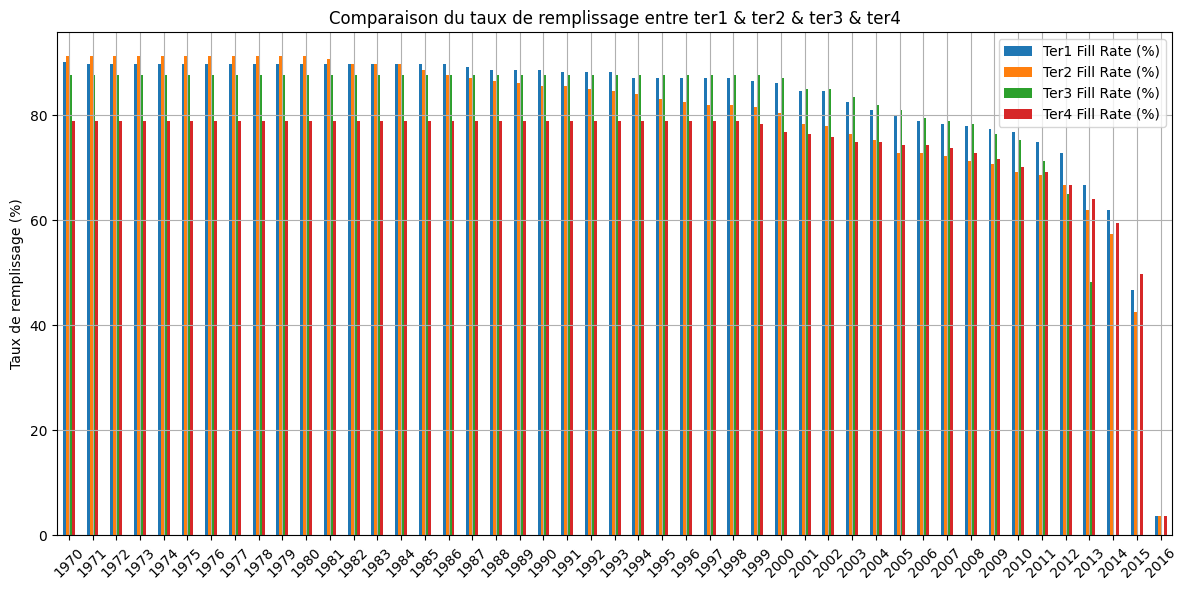

In [143]:
cols_to_drop_ter = ['Country Name', 'Country Code', 'Region','Income Group', 'Topic', 'Indicator Name', 'Indicator Code', 'Latest population census']
df_topic_ter1_comparison = df_topic_ter_1.copy()
df_topic_ter1_comparison  = df_topic_ter1_comparison.drop(columns = cols_to_drop_ter)

df_topic_ter2_comparison = df_topic_ter_2.copy()
df_topic_ter2_comparison = df_topic_ter2_comparison.drop(columns = cols_to_drop_ter)

df_topic_ter3_comparison = df_topic_ter_3.copy()
df_topic_ter3_comparison = df_topic_ter3_comparison.drop(columns = cols_to_drop_ter)

df_topic_ter4_comparison = df_topic_ter_4.copy()
df_topic_ter4_comparison = df_topic_ter4_comparison.drop(columns = cols_to_drop_ter)

fill_rate_ter1 = df_topic_ter1_comparison.notna().mean() * 100
fill_rate_ter2 = df_topic_ter2_comparison.notna().mean() * 100
fill_rate_ter3 = df_topic_ter3_comparison.notna().mean() * 100
fill_rate_ter4 = df_topic_ter4_comparison.notna().mean() * 100
fill_rate_comparison = pd.DataFrame({
    'Ter1 Fill Rate (%)': fill_rate_ter1,
    'Ter2 Fill Rate (%)': fill_rate_ter2,
    'Ter3 Fill Rate (%)': fill_rate_ter3,
    'Ter4 Fill Rate (%)': fill_rate_ter4,
})


fill_rate_comparison[['Ter1 Fill Rate (%)', 'Ter2 Fill Rate (%)', 'Ter3 Fill Rate (%)', 'Ter4 Fill Rate (%)']].plot(kind='bar', figsize=(12, 6))
plt.ylabel('Taux de remplissage (%)')
plt.title('Comparaison du taux de remplissage entre ter1 & ter2 & ter3 & ter4')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Au vu du taux de remplissage après bfill, l'indicateur qui semble le mieux rempli & le plus adéquat, est **Percentage of enrolment in tertiary education in private institutions (%)**

In [144]:
indic_to_keep = ['Percentage of enrolment in tertiary education in private institutions (%)']
df_topic_tertiary = df_topic_tertiary[
    df_topic_tertiary['Indicator Name'].isin(indic_to_keep)
]

## Création d'un nouveau DF avec les 4 indicateurs choisis

In [145]:
indicators_selected = ['GNI per capita, Atlas method (current US$)',
                       'Population of the official age for upper secondary education, both sexes (number)',
                       'Internet users (per 100 people)',
                       'Percentage of enrolment in tertiary education in private institutions (%)']
df_indic = df_indicators_passed[df_indicators_passed['Indicator Name'].isin(indicators_selected)]
df_indic.head(10)

,Country Code,Country Name,Region,Income Group,Latest population census,Indicator Name,Topic,Indicator Code,1970,1971,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
611,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Internet users (per 100 people),Infrastructure: Communications,IT.NET.USER.P2,NaN,NaN,...,3.090000e+01,5.200000e+01,5.800000e+01,6.200000e+01,6.900000e+01,7.400000e+01,7.890000e+01,8.378000e+01,8.866123e+01,93.542454
1621,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Percentage of enrolment in tertiary education ...,Tertiary,SE.TER.PRIV.ZS,NaN,NaN,...,1.729391e+01,1.512043e+01,2.049180e+01,1.918455e+01,2.116613e+01,2.121328e+01,5.156647e+01,5.044534e+01,5.394511e+01,NaN
2149,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010,Population of the official age for upper secon...,Population,SP.SEC.UTOT.IN,4166.0,4168.0,...,4.486000e+03,4.543000e+03,4.607000e+03,4.623000e+03,4.594000e+03,4.553000e+03,4.529000e+03,4.510000e+03,4.492000e+03,4465.000000
3814,AFG,Afghanistan,South Asia,Low income,1979,Internet users (per 100 people),Infrastructure: Communications,IT.NET.USER.P2,NaN,NaN,...,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.454545e+00,5.900000e+00,7.000000e+00,8.260000e+00,10.595726
4824,AFG,Afghanistan,South Asia,Low income,1979,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,...,3.300000e+02,3.600000e+02,4.600000e+02,5.000000e+02,5.600000e+02,6.700000e+02,6.700000e+02,6.300000e+02,5.900000e+02,570.000000
5185,AFG,Afghanistan,South Asia,Low income,1979,Percentage of enrolment in tertiary education ...,Tertiary,SE.TER.PRIV.ZS,NaN,NaN,...,NaN,NaN,NaN,NaN,1.331230e+00,NaN,NaN,4.178314e+01,NaN,NaN
5352,AFG,Afghanistan,South Asia,Low income,1979,Population of the official age for upper secon...,Population,SP.SEC.UTOT.IN,659303.0,675262.0,...,1.625093e+06,1.656586e+06,1.700525e+06,1.765556e+06,1.864912e+06,1.977811e+06,2.095149e+06,2.206482e+06,2.305137e+06,NaN
7017,AGO,Angola,Sub-Saharan Africa,Upper middle income,1970,Internet users (per 100 people),Infrastructure: Communications,IT.NET.USER.P2,NaN,NaN,...,1.700000e+00,1.900000e+00,2.300000e+00,2.800000e+00,3.100000e+00,6.500000e+00,8.900000e+00,1.020000e+01,1.240000e+01,13.000000
8027,AGO,Angola,Sub-Saharan Africa,Upper middle income,1970,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NY.GNP.PCAP.CD,NaN,NaN,...,2.160000e+03,2.760000e+03,3.190000e+03,3.240000e+03,3.390000e+03,3.820000e+03,4.350000e+03,4.470000e+03,4.040000e+03,3450.000000


### Pays qui n'ont pas l'ensemble des indicateurs remplis

In [146]:
# 1. Mettre Country Name + Indicator Name en index
df_values = df_indic.set_index(['Country Name', 'Indicator Name'])[years_passed]

# 2. Si tu veux déjà moyenner sur les années
df_mean = df_values.sum(axis=1).reset_index()
df_mean.columns = ['Country Name', 'Indicator Name', 'Valeur']

# 3. Pivot avec valeurs
df_pivot = df_mean.pivot(index='Country Name', columns='Indicator Name', values='Valeur')
df_pivot

Indicator Name,"GNI per capita, Atlas method (current US$)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),"Population of the official age for upper secondary education, both sexes (number)"
Country Name,,,,
Afghanistan,6070.0,57.034528,43.114368,52454766.0
Albania,65160.0,495.783023,149.276401,10676987.0
Algeria,110800.0,232.619839,0.000000,80014407.0
American Samoa,0.0,0.000000,0.000000,0.0
Andorra,0.0,1020.440018,22.407400,60929.0
...,...,...,...,...
Vanuatu,53590.0,154.859127,0.000000,467499.0
Vietnam,21310.0,388.183646,166.511041,200695043.0
West Bank and Gaza,43340.0,467.511352,783.211891,5169080.0


In [147]:
# Lister les pays qui n'ont aucun indicateur rempli.
country_0_on_4 = df_pivot[(df_pivot == 0).all(axis=1)].index.tolist()
df_pivot.loc[country_0_on_4]

Indicator Name,"GNI per capita, Atlas method (current US$)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),"Population of the official age for upper secondary education, both sexes (number)"
Country Name,,,,
American Samoa,0.0,0.0,0.0,0.0
Northern Mariana Islands,0.0,0.0,0.0,0.0
St. Martin (French part),0.0,0.0,0.0,0.0


In [148]:
# 2. Compter le nombre de 0% par pays
nb_zeros = (df_pivot == 0).sum(axis=1)

# 3. Pays avec au moins 3 indicateurs non remplis (mais pas 100% vides)
country_0_in_3 = nb_zeros[nb_zeros >= 3].index.difference(country_0_on_4)

# 4. Afficher les pays correspondants
df_pivot.loc[country_0_in_3]

Indicator Name,"GNI per capita, Atlas method (current US$)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),"Population of the official age for upper secondary education, both sexes (number)"
Country Name,,,,
Guam,0.0,845.987926,0.0,0.0
Isle of Man,1002380.0,0.000000,0.0,0.0
Nauru,0.0,0.000000,0.0,7768.0
Sint Maarten (Dutch part),0.0,0.000000,300.0,0.0
Turks and Caicos Islands,0.0,0.000000,100.0,0.0


Les pays qui n'ont aucun indicateurs remplis, ou au moins 2 sur 3 de non remplis sont des îles. On peut donc ne pas en tenir compte.

In [149]:
# Garder ceux qui ont au moins 2 indicateurs à 0%
country_0_in_2 = nb_zeros[nb_zeros >= 2].index.difference(country_0_in_3)

df_pivot.loc[country_0_in_2]


Indicator Name,"GNI per capita, Atlas method (current US$)",Internet users (per 100 people),Percentage of enrolment in tertiary education in private institutions (%),"Population of the official age for upper secondary education, both sexes (number)"
Country Name,,,,
American Samoa,0.0,0.000000,0.0,0.0
Cayman Islands,0.0,770.649295,0.0,517.0
French Polynesia,341400.0,612.955532,0.0,0.0
Gibraltar,0.0,686.478780,0.0,731.0
Greenland,520130.0,1032.409368,0.0,0.0
Monaco,2748570.0,1171.499517,0.0,0.0
New Caledonia,312990.0,649.571007,0.0,0.0
Northern Mariana Islands,0.0,0.000000,0.0,0.0
San Marino,0.0,608.129476,0.0,9126.0


Les pays pour lesquels il manque des indicateurs sont majoritairement des **îles**, il n'est pas utile de chercher à récupérer ces valeurs.  
Au vu de la richesse et le type de population vivant **Monaco**, il ne paraît pas non plus utile de récuper ses données.

On peut donc elever ces pays de notre DF

In [150]:
# Tes 3 DataFrames
dfs = [country_0_on_4, country_0_in_3, country_0_in_2]

# Récupérer tous les noms de pays
country_to_drop = []
for df in dfs:
    # Si df est un DataFrame
    if hasattr(df, 'columns') and 'Country Name' in df.columns:
        country_to_drop.extend(df['Country Name'].tolist())
    # Si df est un Index ou une liste
    else:
        country_to_drop.extend(list(df))

# Supprimer doublons
country_to_drop = list(set(country_to_drop))

# Supprimer ces pays d'un autre DataFrame
df_indic = df_indic[~df_indic['Country Name'].isin(country_to_drop)]
df_bfilled = df_bfilled[~df_bfilled['Country Name'].isin(country_to_drop)]

In [151]:
# 1. Comme il y a un seul indicateur par topic, on peut enlever les colonnes Indicator Code, et Latest population census.
cols_to_drop = ['Latest population census', 'Indicator Code']
df_indic_filtered = df_indic.drop(columns = cols_to_drop)
df_indic_filtered.head(5)

,Country Code,Country Name,Region,Income Group,Indicator Name,Topic,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
611,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Internet users (per 100 people),Infrastructure: Communications,NaN,NaN,NaN,NaN,...,30.900000,52.00000,58.0000,62.000000,69.00000,74.000000,78.900000,83.780000,88.661227,93.542454
1621,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Percentage of enrolment in tertiary education ...,Tertiary,NaN,NaN,NaN,NaN,...,17.293909,15.12043,20.4918,19.184549,21.16613,21.213280,51.566471,50.445339,53.945110,NaN
2149,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,Population of the official age for upper secon...,Population,4166.0,4168.0,4150.0,4139.0,...,4486.000000,4543.00000,4607.0000,4623.000000,4594.00000,4553.000000,4529.000000,4510.000000,4492.000000,4465.000000
3814,AFG,Afghanistan,South Asia,Low income,Internet users (per 100 people),Infrastructure: Communications,NaN,NaN,NaN,NaN,...,1.900000,1.84000,3.5500,4.000000,5.00000,5.454545,5.900000,7.000000,8.260000,10.595726


## Indicateur population

In [152]:
df_topic_pop = df_indic_filtered[df_indic_filtered['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)']
df_bfilled_indic_pop = df_bfilled[df_bfilled['Indicator Name'] == 'Population of the official age for upper secondary education, both sexes (number)']
df_bfilled_indic_pop.count()

Country Code                178
Country Name                178
Region                      178
Income Group                178
Latest population census    178
Indicator Name              178
Topic                       178
Indicator Code              178
1970                        177
1971                        177
1972                        177
1973                        177
1974                        177
1975                        177
1976                        177
1977                        177
1978                        177
1979                        177
1980                        177
1981                        177
1982                        177
1983                        177
1984                        177
1985                        177
1986                        177
1987                        177
1988                        177
1989                        177
1990                        177
1991                        177
1992                        177
1993    

Regardons les pays manquants en 1998, 2002, 2014 et 2016

In [153]:
missing_98 = set(df_bfilled_indic_pop[
    df_bfilled_indic_pop['1998'].isna()
]['Country Name'].unique())
missing_98

{'Singapore'}

Singapour est le seul pays qu'il pourrait être intéressant de regarder plus en détail

In [154]:
missing_2002 = set(df_bfilled_indic_pop[
    df_bfilled_indic_pop['2002'].isna()
]['Country Name'].unique())
missing_2002 = missing_2002 - missing_98
missing_2002

{'Andorra', 'Bosnia and Herzegovina'}

Ces pays ayant une population faible, il n'est pas nécessaire de récupérer leurs données.

In [155]:
missing_2015 = set(df_bfilled_indic_pop[
    df_bfilled_indic_pop['2015'].isna()
]['Country Name'].unique())
missing_2015 = missing_2015 - missing_2002 - missing_98
missing_2015

{'Ukraine'}

Au vu de la situation géopolitique actuelle, nous n'allons pas récupérer les données de l'Ukraine.

In [156]:
missing_2016 = set(df_bfilled_indic_pop[
    df_bfilled_indic_pop['2016'].isna()
]['Country Name'].unique())
missing_2016 = missing_2016 - missing_2015 - missing_2002 - missing_98
missing_2016

{'Afghanistan',
 'Algeria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Brazil',
 'Cyprus',
 'India',
 'Iraq',
 'Jordan',
 'Kuwait',
 'Lao PDR',
 'Lebanon',
 'Libya',
 'Liechtenstein',
 'Malaysia',
 'Moldova',
 'Morocco',
 'Myanmar',
 'Oman',
 'Pakistan',
 'Qatar',
 'Saudi Arabia',
 'Serbia',
 'Sri Lanka',
 'Sudan',
 'Syrian Arab Republic',
 'Thailand',
 'Tunisia',
 'United Arab Emirates',
 'Vanuatu',
 'Vietnam',
 'West Bank and Gaza'}

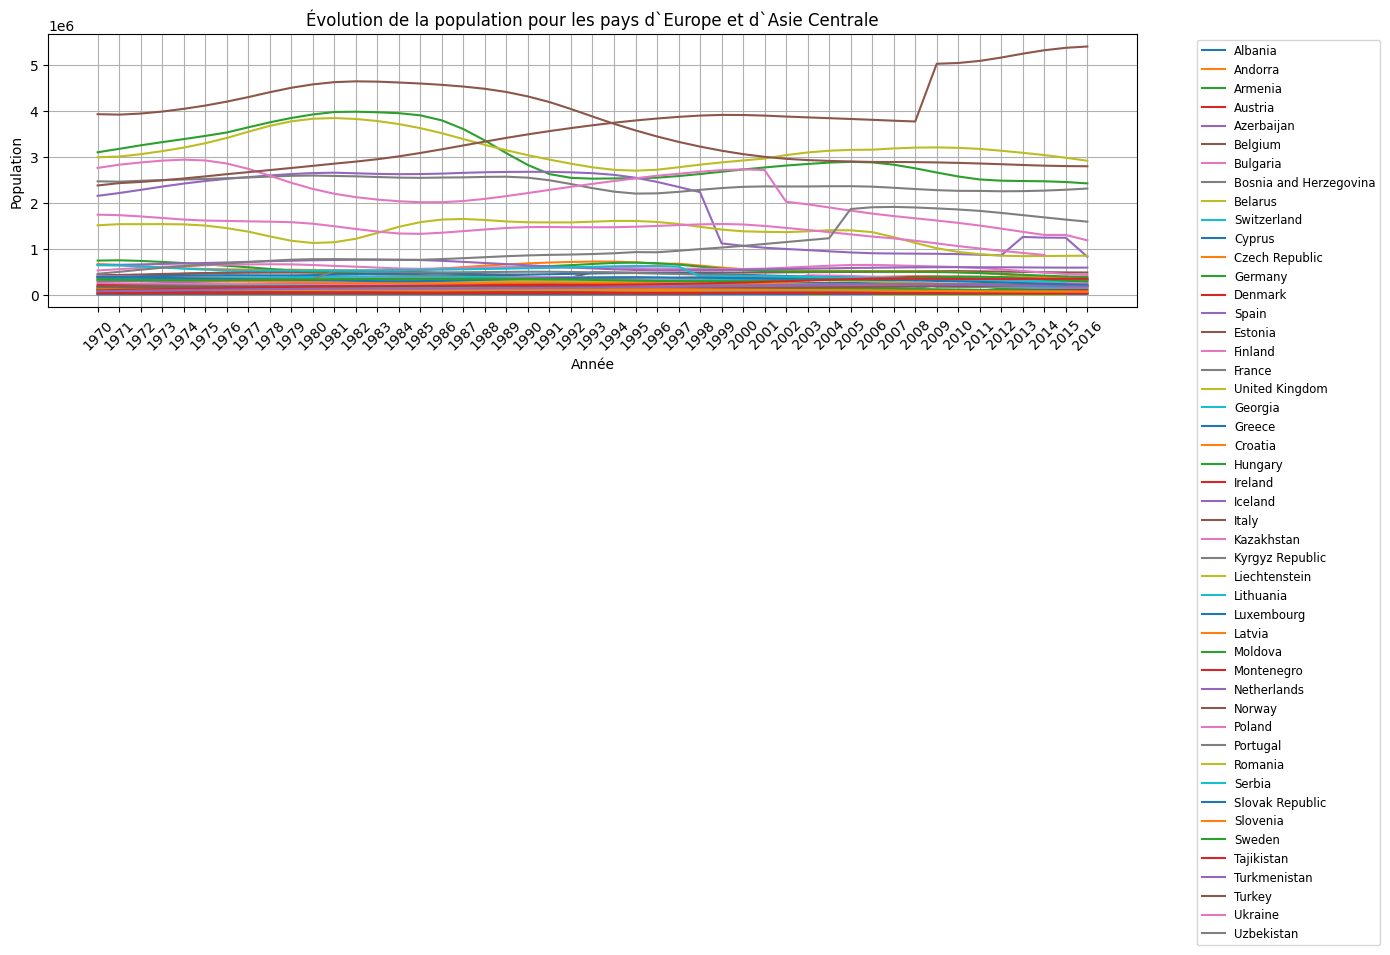

In [157]:
# 1. Filtrer les données
df_ea_pop = df_indic_filtered[
    (df_indic_filtered['Region'] == 'Europe & Central Asia') &
    (df_indic_filtered['Topic'] == 'Population')
]

# 2. Sélectionner uniquement les colonnes d'années
year_columns = [col for col in df_ea_pop.columns if col.isdigit()]

# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_ea_pop = df_ea_pop.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_ea_pop.index:
    plt.plot(year_columns, df_ea_pop.loc[country, year_columns], label=country)

plt.title('Évolution de la population pour les pays d`Europe et d`Asie Centrale')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [158]:
# 1. Filtrer les données
df_ea_pop = df_indic_filtered[
    (df_indic_filtered['Region'] == 'Europe & Central Asia') &
    (df_indic_filtered['Topic'] == 'Population')
]

# 2. Sélectionner uniquement les colonnes d'années
year_columns = [col for col in df_ea_pop.columns if col.isdigit()]

df_nan_or_zero = df_ea_pop[
    (df_ea_pop['2016'].isna()) | (df_ea_pop['2016'] == 0)
]
df_nan_or_zero['Country Name'].unique()

array(['Andorra', 'Azerbaijan', 'Bosnia and Herzegovina', 'Cyprus',
       'Liechtenstein', 'Moldova', 'Serbia', 'Ukraine'], dtype=object)

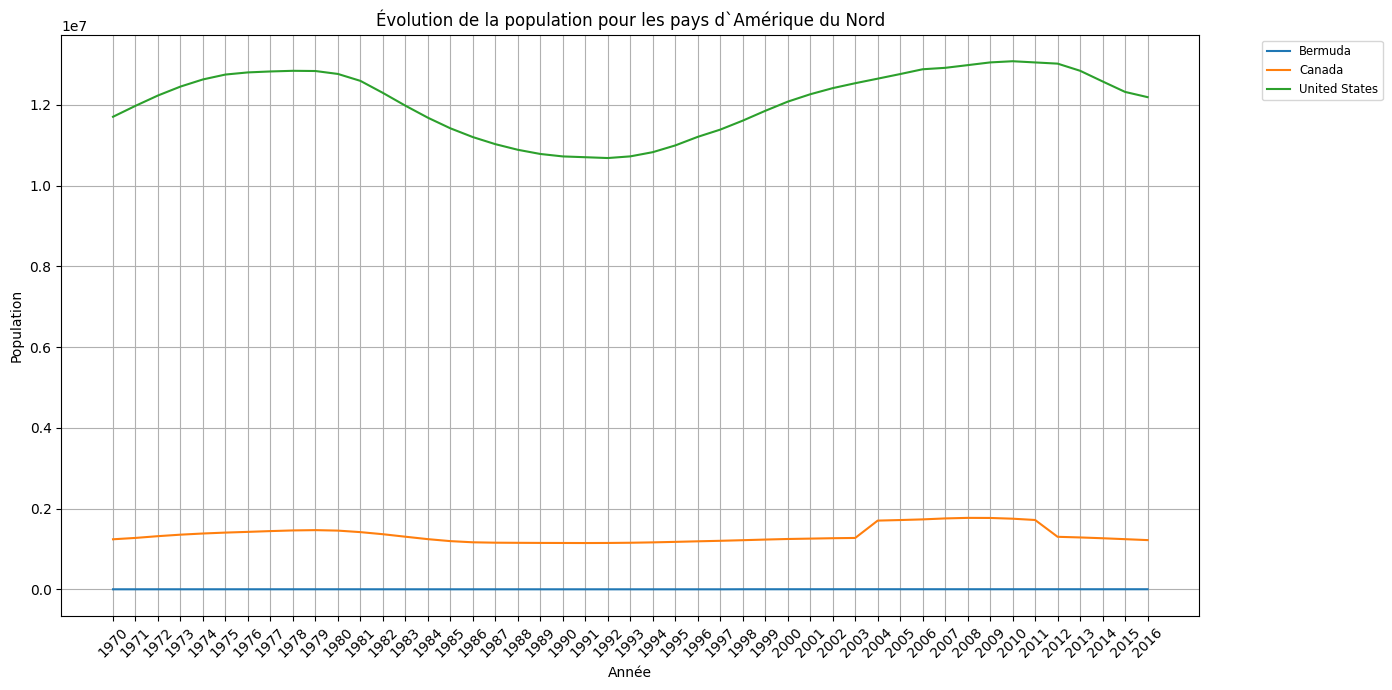

In [159]:
# 1. Filtrer les données
df_na_pop = df_indic_filtered[
    (df_indic_filtered['Region'] == 'North America') &
    (df_indic_filtered['Topic'] == 'Population')
]

# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_na_pop = df_na_pop.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_na_pop.index:
    plt.plot(year_columns, df_na_pop.loc[country, year_columns], label=country)

plt.title('Évolution de la population pour les pays d`Amérique du Nord')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

Les pays d'Amérique du Nord sont tous totalement rempli.

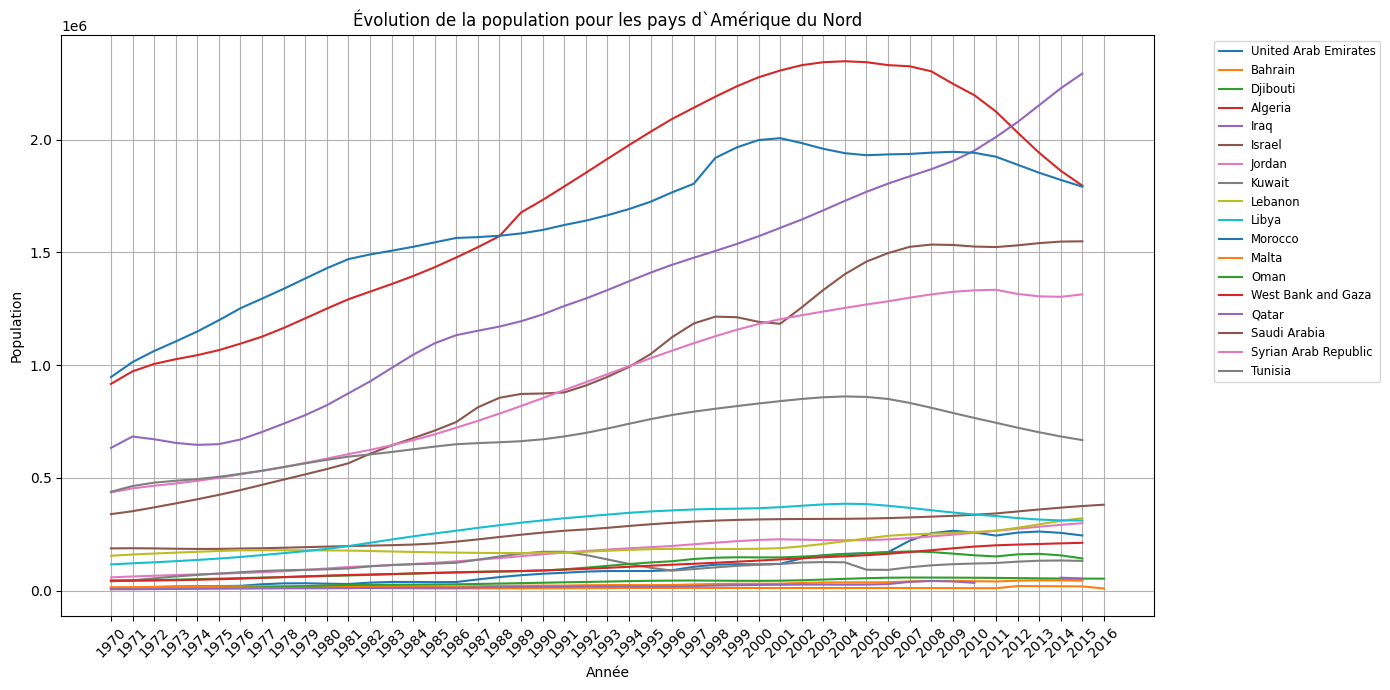

In [160]:
# 1. Filtrer les données
df_me_pop = df_indic_filtered[
    (df_indic_filtered['Region'] == 'Middle East & North Africa') &
    (df_indic_filtered['Topic'] == 'Population')
]
df_middle = df_me_pop.copy()
# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_middle = df_middle.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_middle.index:
    plt.plot(year_columns, df_middle.loc[country, year_columns], label=country)

plt.title('Évolution de la population pour les pays d`Amérique du Nord')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

Comme il ne manque que l'année 2016 pour certains pays, on va repartir des valeurs de 2015

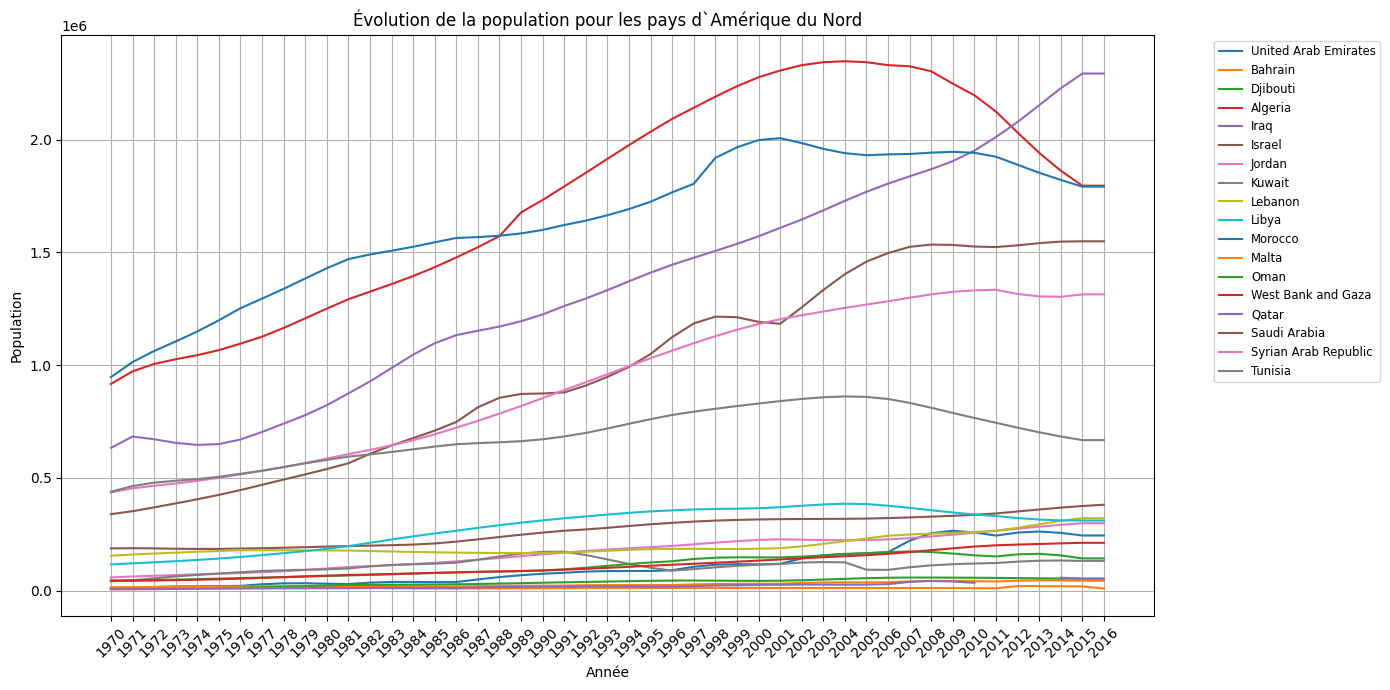

In [161]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = df_me_pop["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_me_pop.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_me_pop.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_me_pop = df_me_pop.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_me_pop.index:
    plt.plot(year_columns, df_me_pop.loc[country, year_columns], label=country)

plt.title('Évolution de la population pour les pays d`Amérique du Nord')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

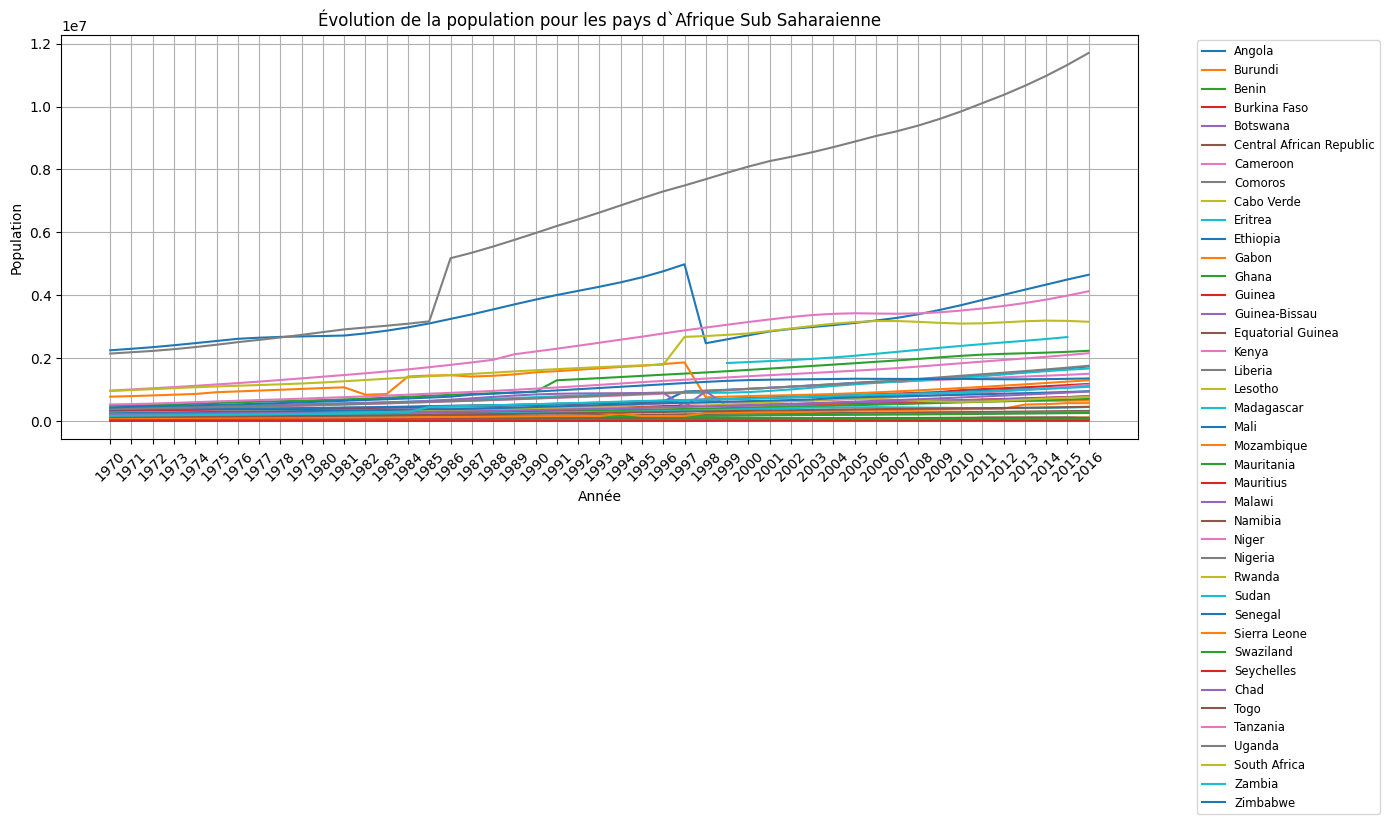

In [162]:
# 1. Filtrer les données
df_africa_pop = df_indic_filtered[
    (df_indic_filtered['Region'] == 'Sub-Saharan Africa') &
    (df_indic_filtered['Topic'] == 'Population')
]
df_af_pop = df_africa_pop.copy()


# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_af_pop = df_af_pop.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_af_pop.index:
    plt.plot(year_columns, df_af_pop.loc[country, year_columns], label=country)

plt.title('Évolution de la population pour les pays d`Afrique Sub Saharaienne')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [163]:
df_2016_nan_or_zero = df_africa_pop[
    (df_africa_pop["2016"].isna()) | (df_africa_pop["2016"] == 0)
]
pays_manquants_2016 = df_2016_nan_or_zero['Country Name'].unique()
pays_manquants_2016

array(['Sudan'], dtype=object)

In [164]:
df_nan_or_zero = df_africa_pop[
    (df_africa_pop['2016'].isna()) | (df_africa_pop['2016'] == 0)
]
pays_manquants = df_nan_or_zero['Country Name'].unique()
pays_manquants

array(['Sudan'], dtype=object)

Il n'y a que le **Soudan** qui n'a pas de valeur en 2016. Regardons plus précisement son évolution.

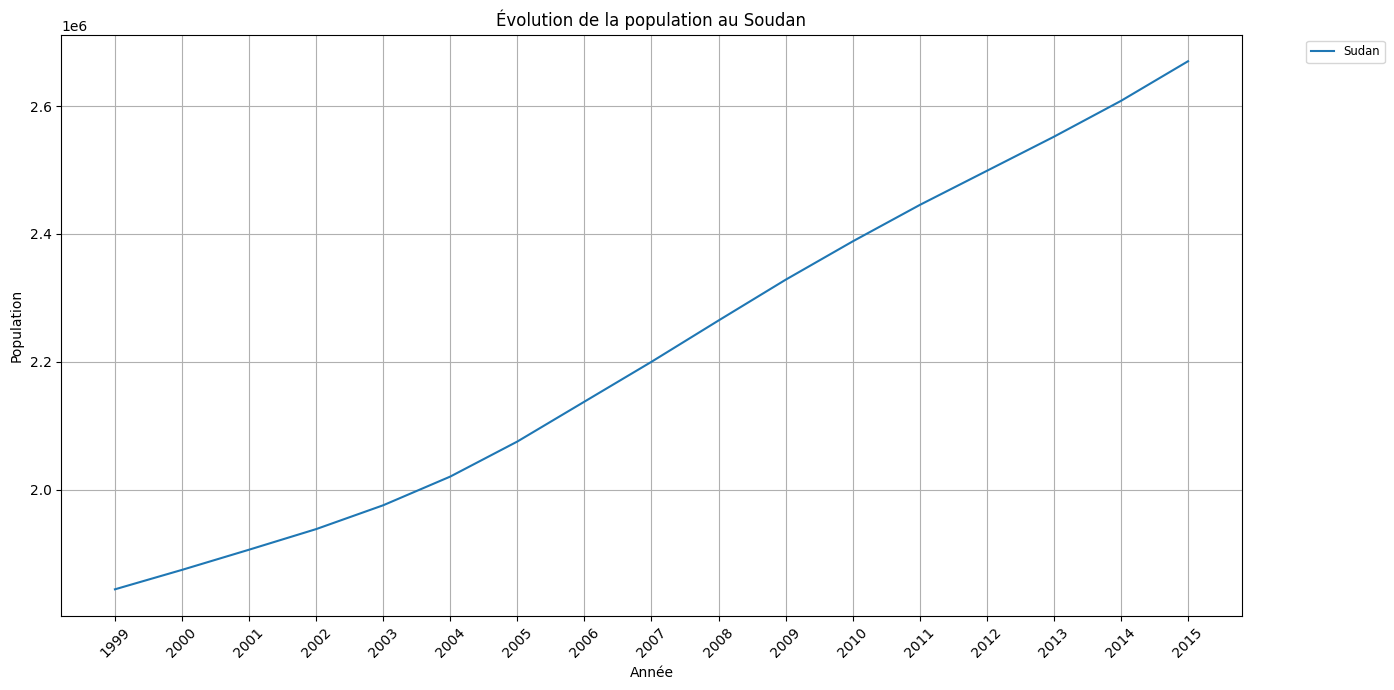

In [165]:
# 1. Filtrer les données
df_soudan_pop = df_africa_pop[
    (df_africa_pop['Country Name'] == 'Sudan')]

# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_soudan_pop  = df_soudan_pop.set_index('Country Name')

# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_soudan_pop.index:
    plt.plot(year_columns, df_soudan_pop.loc[country, year_columns], label=country)

plt.title('Évolution de la population au Soudan')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

## Indicateur Communication

In [166]:
df_topic_web = df_indic_filtered[df_indic_filtered['Indicator Name'] == 'Internet users (per 100 people)']
df_bfilled_web = df_bfilled[df_bfilled['Indicator Name'] == 'Internet users (per 100 people)']
df_bfilled_web.count()

Country Code                178
Country Name                178
Region                      178
Income Group                178
Latest population census    178
Indicator Name              178
Topic                       178
Indicator Code              178
1970                        178
1971                        178
1972                        178
1973                        178
1974                        178
1975                        178
1976                        178
1977                        178
1978                        178
1979                        178
1980                        178
1981                        178
1982                        178
1983                        178
1984                        178
1985                        178
1986                        178
1987                        178
1988                        178
1989                        178
1990                        178
1991                        178
1992                        178
1993    

Regardons plus en détail les pays manquants en 2005 et 2012

In [167]:
missing_2005 = set(df_bfilled_web[
    df_bfilled_web['2005'].isna()
]['Country Name'].unique())
missing_2005

{'Palau'}

Les Paolos étant un archipel en Océanie, il n'est pas nécessaire de récuperer ses données.

In [168]:
missing_2012 = set(df_bfilled_indic_pop[
    df_bfilled_indic_pop['2012'].isna()
]['Country Name'].unique())
missing_2012 = missing_2012 - missing_2005
missing_2012

{'Andorra', 'Bosnia and Herzegovina', 'Singapore'}

On s'intéressera uniquement à récupérer les données liées à Singapour.

In [169]:
df_singapore = df_indic_filtered[
    (df_indic_filtered['Country Name'] == 'Singapore')
]
df_singapore.head(1)

,Country Code,Country Name,Region,Income Group,Indicator Name,Topic,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
493873,SGP,Singapore,East Asia & Pacific,High income: nonOECD,Internet users (per 100 people),Infrastructure: Communications,NaN,NaN,NaN,NaN,...,69.9,69.0,69.0,71.0,71.0,72.0,80.902057,79.029236,79.012957,81.0


Singapour est un pays d'Asie de l'Est, avec comme Income Group, High income: nonOCED

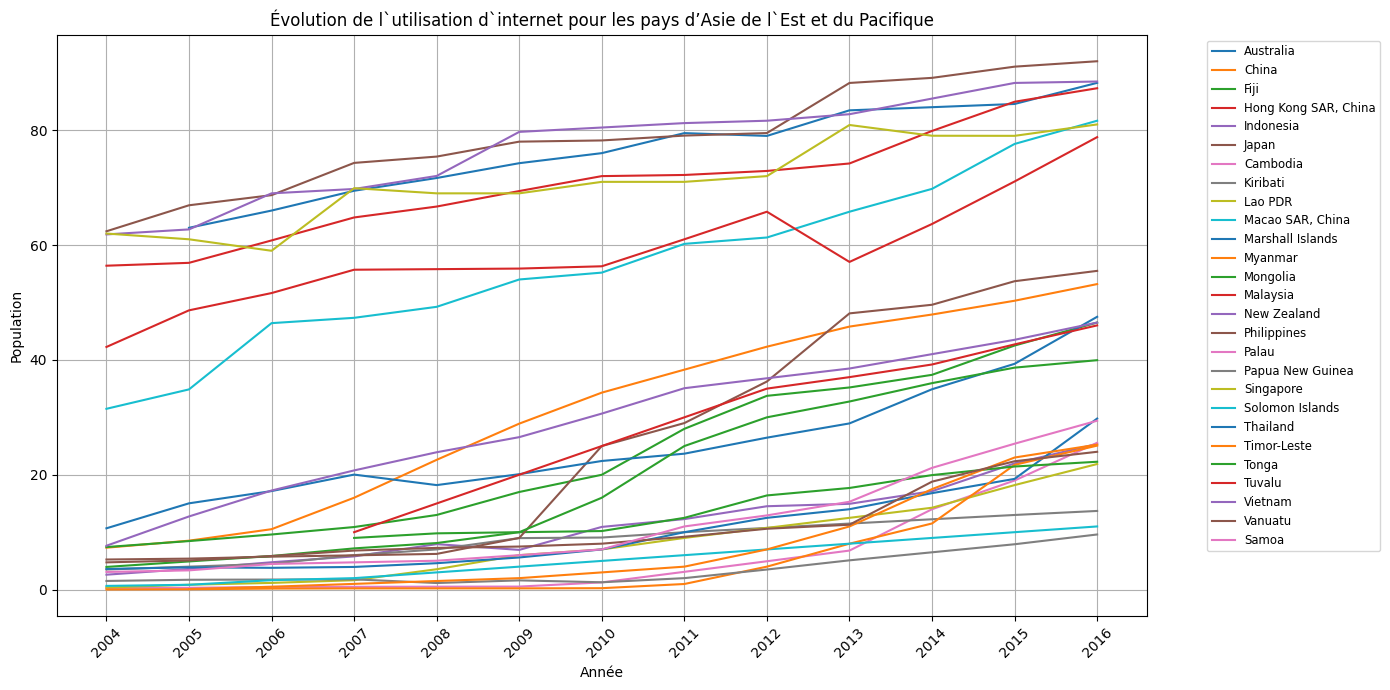

In [170]:
# 1. Filtrer les données

years_web = [year for year in years_passed if 2004 <= int(year) <= 2016]

df_eastasia_web = df_indic_filtered[
    (df_indic_filtered['Region'] == 'East Asia & Pacific') &
    (df_indic_filtered['Topic'] == 'Infrastructure: Communications')
]

df_ea_web = df_eastasia_web.copy()
# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_ea_web = df_ea_web.set_index('Country Name')


# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_ea_web.index:
    plt.plot(years_web, df_ea_web.loc[country, years_web], label=country)

plt.title('Évolution de l`utilisation d`internet pour les pays d’Asie de l`Est et du Pacifique')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

In [171]:
# Transformation longue
years_to_check = [year for year in years_passed if 2012 <= int(year) <= 2016]
df_web_taux = df_topic_web.melt(
    id_vars=[col for col in df_topic_web.columns if col not in years_to_check],
    value_vars=years_to_check,
    var_name='Year',
    value_name='Taux'
)

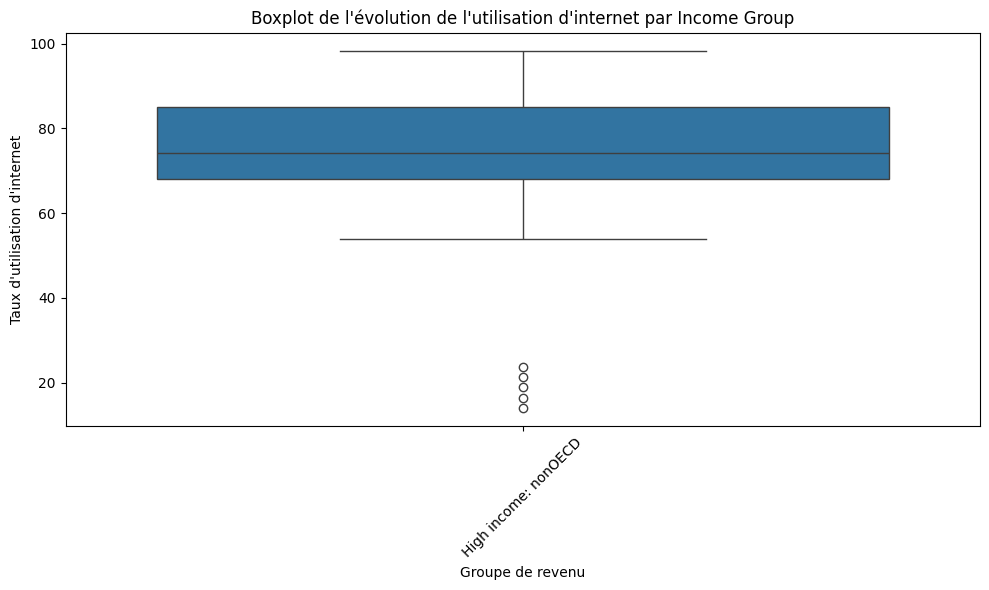

In [172]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x="Income Group", 
    y="Taux", 
    data=df_web_taux, 
    order=["High income: nonOECD"]
)

plt.title("Boxplot de l'évolution de l'utilisation d'internet par Income Group")
plt.ylabel("Taux d'utilisation d'internet")
plt.xlabel("Groupe de revenu")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Regardons les pays qui ont un GNI faible, pour voir si on peut ne pas les prendre en compte dans notre calcul.

On peut maintenant se dire que l'on peut appliquer la médianne à Singapour.

In [173]:

df_high_income = df_topic_web[df_topic_web['Income Group'] == 'High income: nonOECD']

mediane_by_year = df_high_income[years_to_check].median(axis=0)

# 3. Appliquer à Singapour
df_indic_filtered.loc[df_indic_filtered['Country Name'] == 'Singapore', years_to_check] = mediane_by_year.values

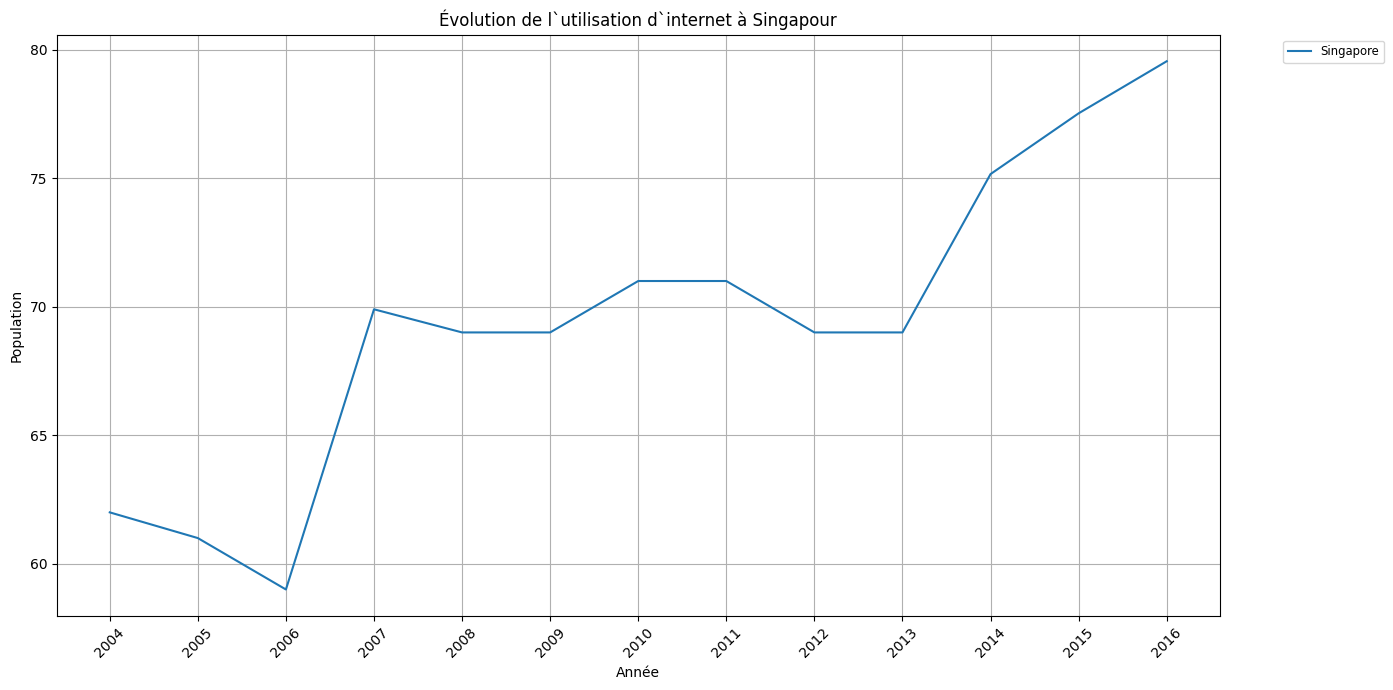

In [174]:
df_eastasia_web = df_indic_filtered[
    (df_indic_filtered['Region'] == 'East Asia & Pacific') &
    (df_indic_filtered['Topic'] == 'Infrastructure: Communications') &
    (df_indic_filtered['Country Name'] == 'Singapore')
]

df_ea_web = df_eastasia_web.copy()
# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_ea_web = df_ea_web.set_index('Country Name')


# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_ea_web.index:
    plt.plot(years_web, df_ea_web.loc[country, years_web], label=country)

plt.title('Évolution de l`utilisation d`internet à Singapour')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

## Indicateur Economic

In [175]:
df_eco = df_indic_filtered[
    (df_indic_filtered['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita')
]
df_bfilled_eco = df_bfilled[df_bfilled['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita']
df_bfilled_eco.count()

Country Code                178
Country Name                178
Region                      178
Income Group                178
Latest population census    178
Indicator Name              178
Topic                       178
Indicator Code              178
1970                        176
1971                        176
1972                        176
1973                        176
1974                        176
1975                        176
1976                        176
1977                        176
1978                        176
1979                        176
1980                        176
1981                        176
1982                        176
1983                        176
1984                        176
1985                        176
1986                        176
1987                        176
1988                        176
1989                        176
1990                        176
1991                        176
1992                        176
1993    

Regardons plus en détail les pays manquants en 2005,2011,2014et 2016

In [176]:
missing_2005 = set(df_bfilled_eco[
    df_bfilled_eco['2005'].isna()
]['Country Name'].unique())
missing_2005

{'Andorra', 'Aruba'}

Nous n'allons pas étudier ces pays.

In [177]:
missing_2011 = set(df_bfilled_eco[
    df_bfilled_eco['2011'].isna()
]['Country Name'].unique())
missing_2011 = missing_2011 - missing_2005
missing_2011

{'Djibouti', 'Liechtenstein', 'Syrian Arab Republic'}

Djibouti n'étant pas un pays riche, la Syrie étant dans une situation géopolitique compliquée & le Liechtenstein était faiblement peuplé, nous n'allons pas récupérer ces données.

In [178]:
missing_2014 = set(df_bfilled_eco[
    df_bfilled_eco['2014'].isna()
]['Country Name'].unique())
missing_2014 = missing_2014 - missing_2011 - missing_2005
missing_2014

{'Bermuda', 'Cuba', 'Eritrea', 'Libya', 'Puerto Rico'}

Ces pays étant des îles, ou avec des situations géopolitiques complexes, nous n'allons pas récupérer ces données.

In [179]:
missing_2016 = set(df_bfilled_eco[
    df_bfilled_eco['2016'].isna()
]['Country Name'].unique())
missing_2016 = missing_2016 - missing_2014 - missing_2011 - missing_2005
missing_2016

{'Bahrain', 'Macao SAR, China', 'Oman', 'Qatar', 'Vanuatu'}

Nous allons nous intéresser à récupérer les données concernant Oman & le Qatar

In [180]:
country_to_fill = ['Oman', 'Qatar']

In [181]:
df_oman_qatar = df_eco[df_eco['Country Name'].isin(country_to_fill)]
df_oman_qatar

,Country Code,Country Name,Region,Income Group,Indicator Name,Topic,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
434026,OMN,Oman,Middle East & North Africa,High income: nonOECD,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,320.0,330.0,360.0,310.0,...,14460.0,17380.0,17700.0,18170.0,17000.0,19560.0,20580.0,19490.0,18080.0,NaN
475665,QAT,Qatar,Middle East & North Africa,High income: nonOECD,"GNI per capita, Atlas method (current US$)",Economic Policy & Debt: National accounts: Atl...,NaN,NaN,NaN,NaN,...,59430.0,67810.0,63730.0,66360.0,69820.0,75850.0,81810.0,82750.0,75660.0,NaN


On constate qu'ils sont de la même région, & du même Income Group. Regardons l'évolution de ces deux indicateurs pendant ces dernières années.

Regardons l'évolution de l'Income Group sur les 5 dernières années.

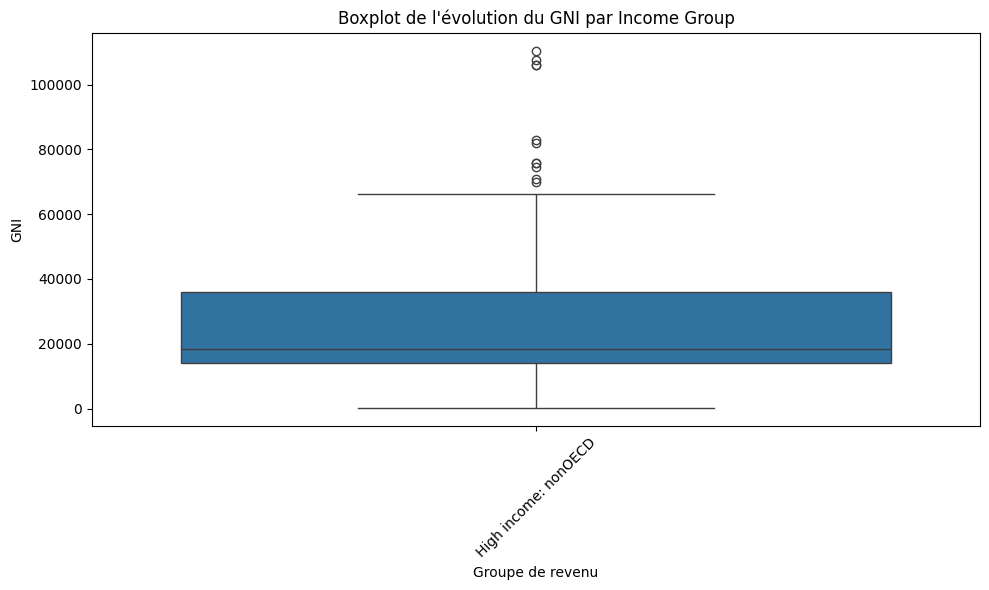

In [182]:
years_to_check = [year for year in years_passed if 2010 <= int(year) <= 2015]
# Transformation longue
df_eco_taux = df_eco.melt(
    id_vars=[col for col in df_eco.columns if col not in years_to_check],
    value_vars=years_to_check,
    var_name='Year',
    value_name='Taux'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x="Income Group", 
    y="Taux", 
    data=df_eco_taux, 
    order=["High income: nonOECD"]
)

plt.title("Boxplot de l'évolution du GNI par Income Group")
plt.ylabel("GNI")
plt.xlabel("Groupe de revenu")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Au vu de l'allure du boxplot, il n'est pas possible de récupérer des valeurs cohérentes pour le Qatar et Oman.

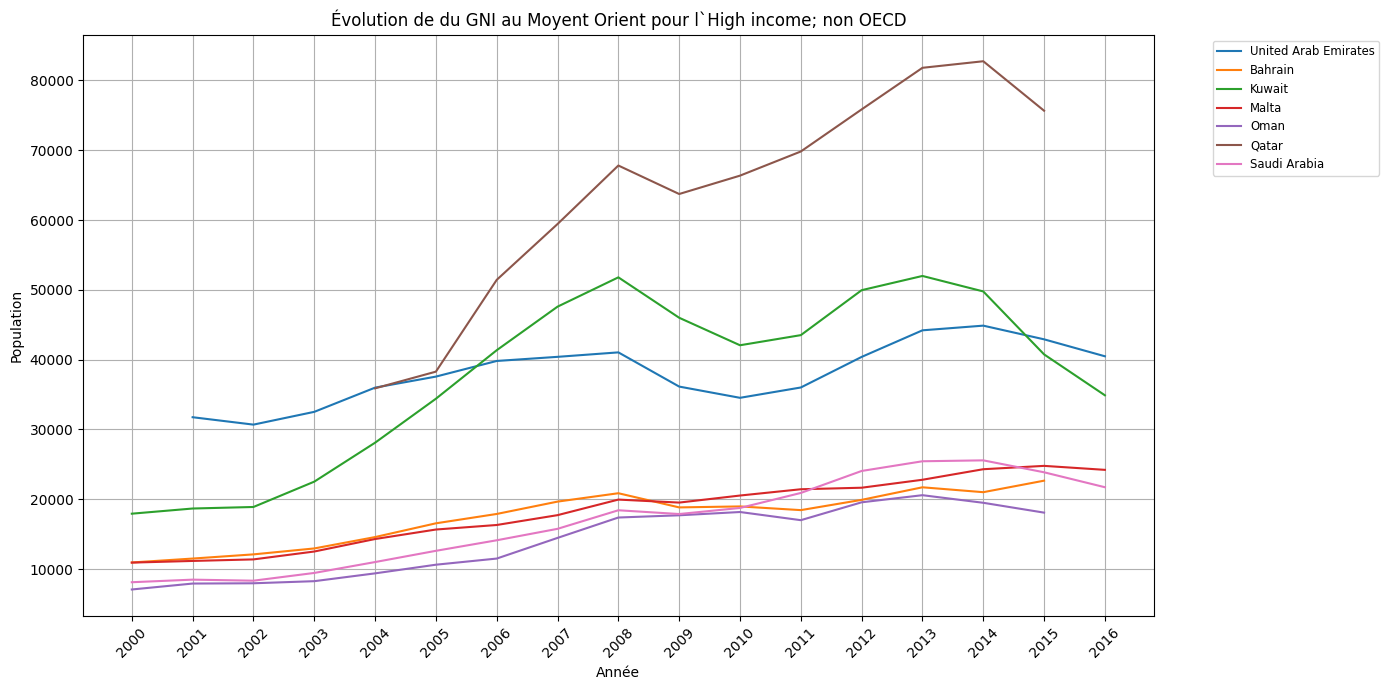

In [183]:
# 1. Filtrer les données
years_eco = [year for year in years_passed if 2000 <= int(year) <= 2016]


df_middleeast_eco = df_indic_filtered[
    (df_indic_filtered['Region'] == 'Middle East & North Africa') &
    (df_indic_filtered['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita') &
    (df_indic_filtered['Income Group'] == 'High income: nonOECD')
]

df_me_eco = df_middleeast_eco.copy()
# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_me_eco = df_me_eco.set_index('Country Name')


# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_me_eco.index:
    plt.plot(years_eco, df_me_eco.loc[country, years_eco], label=country)

plt.title('Évolution de du GNI au Moyent Orient pour l`High income; non OECD')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

On remarque que l'évolution du GNI du Qatar & de Oman, semble réaugmenter après une légère baisse. On peut supposer qu'ils ont dépasser leurs palier de baisse, & leur affecter un taux d'augmentation. Regardons, pour le Qatar, l'évolution entre 2006 & 2008, et pour Oman entre 2011 & 2012.

In [184]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = df_eco["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_eco.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_eco.loc[mask_missing_2016.index[mask_missing_2016], "2015"]


/tmp/ipykernel_11008/662074631.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_middleeast_eco = df_eco[


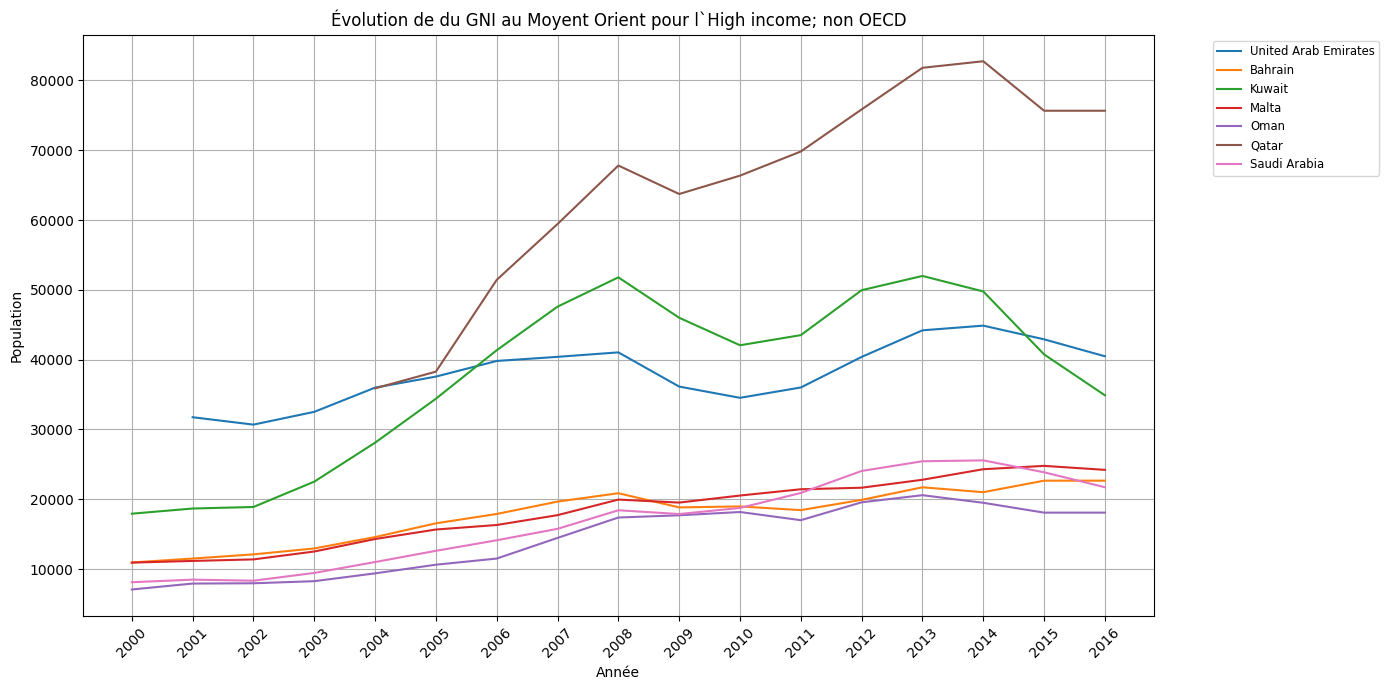

In [185]:
df_middleeast_eco = df_eco[
    (df_indic_filtered['Region'] == 'Middle East & North Africa') &
    (df_indic_filtered['Topic'] == 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita') &
    (df_indic_filtered['Income Group'] == 'High income: nonOECD')
]

# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = df_eco["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_eco.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_eco.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

df_me_eco = df_middleeast_eco.copy()
# 3. Définir l'index comme le nom des pays (ou ajouter le nom des pays dans la légende)
df_me_eco = df_me_eco.set_index('Country Name')


# 4. Tracer les courbes d’évolution de la population pour chaque pays
plt.figure(figsize=(14, 7))
for country in df_me_eco.index:
    plt.plot(years_eco, df_me_eco.loc[country, years_eco], label=country)

plt.title('Évolution de du GNI au Moyent Orient pour l`High income; non OECD')
plt.xlabel('Année')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()

## Indicateur Tertiary

In [186]:
df_tertiary = df_indic_filtered[
    (df_indic_filtered['Indicator Name'] == 'Percentage of enrolment in tertiary education in private institutions (%)')
]
df_bfilled_tertiary = df_bfilled[df_bfilled['Indicator Name'] == 'Percentage of enrolment in tertiary education in private institutions (%)']
df_bfilled_tertiary.count()

Country Code                178
Country Name                178
Region                      178
Income Group                178
Latest population census    178
Indicator Name              178
Topic                       178
Indicator Code              178
1970                        152
1971                        152
1972                        152
1973                        152
1974                        152
1975                        152
1976                        152
1977                        152
1978                        152
1979                        152
1980                        152
1981                        152
1982                        152
1983                        152
1984                        152
1985                        152
1986                        152
1987                        152
1988                        152
1989                        152
1990                        152
1991                        152
1992                        152
1993    

Regardons plus en détail les pays manquants en 1986, 1998, 2002, 2008, 2012, 2013, 2014, 2015, 2016

Commençons par regarder les pays manquant dès 1970

In [187]:
missing_1970 = set(df_bfilled_tertiary[
    df_bfilled_tertiary['1970'].isna()
]['Country Name'].unique())
missing_1970

{'Barbados',
 'Bhutan',
 'Comoros',
 'Cuba',
 'Djibouti',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Greece',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Kiribati',
 'Kuwait',
 'Montenegro',
 'Samoa',
 'Sierra Leone',
 'Solomon Islands',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Turkmenistan',
 'Tuvalu',
 'Vanuatu',
 'Zambia'}

On peut supprimer ces pays car on obtiendra jamais de valeur.

In [188]:
df_tertiary = df_tertiary[~df_tertiary['Country Name'].isin(missing_1970)]
df_bfilled_tertiary = df_bfilled_tertiary[~df_bfilled_tertiary['Country Name'].isin(missing_1970)]

In [189]:
missing_2000 = set(df_bfilled_tertiary[
    df_bfilled_tertiary['2000'].isna()
]['Country Name'].unique())
missing_2000 = missing_2000 - missing_1970
missing_2000

{'Canada', 'Iraq', 'Papua New Guinea', 'Tonga'}

In [190]:
missing_2009 = set(df_bfilled_tertiary[
    df_bfilled_tertiary['2009'].isna()
]['Country Name'].unique())
missing_2009 = missing_2009 - missing_2000 - missing_1970
missing_2009

{'Bolivia',
 'Ethiopia',
 'Libya',
 'Marshall Islands',
 'Myanmar',
 'Namibia',
 'Nicaragua',
 'Palau',
 'Peru',
 'Trinidad and Tobago'}

Il serait intéressant de regarder l'évolution du canada.

In [211]:
# 1) Filtrer Canada
df_canada = df_tertiary[df_tertiary['Country Name'] == 'Canada'].copy()
# On supprime les colonnes non numériques pour ne garder que les années
df_years = df_canada.drop(columns=["Country Name", "Income Group", "Region"], errors="ignore")

# On sélectionne les colonnes non nulles
filled_year = df_years.notna().any()
filled_year

Country Code       True
Indicator Name     True
Topic              True
1970              False
1971              False
1972              False
1973              False
1974              False
1975              False
1976              False
1977              False
1978              False
1979              False
1980              False
1981              False
1982              False
1983              False
1984              False
1985              False
1986              False
1987              False
1988              False
1989              False
1990              False
1991              False
1992              False
1993              False
1994              False
1995              False
1996              False
1997              False
1998              False
1999               True
2000              False
2001              False
2002              False
2003              False
2004              False
2005              False
2006              False
2007              False
2008            

seule l'année 2009 est remplie

In [191]:
missing_2013 = set(df_bfilled_tertiary[
    df_bfilled_tertiary['2013'].isna()
]['Country Name'].unique())
missing_2013 = missing_2013 - missing_2009 - missing_2000 - missing_1970
missing_2013

{'Antigua and Barbuda',
 'Cameroon',
 'Central African Republic',
 'Kenya',
 'Liberia',
 'Luxembourg',
 'Malawi',
 'Mali',
 'Niger',
 'Nigeria',
 'Paraguay',
 'Seychelles',
 'Timor-Leste',
 'Uganda'}

On peut supprimer les pays faiblement développer et les îles

In [192]:
countries_to_drop=['Antigua and Barbuda', 'Luxembourg', 'Seychelles', 'Timor-Leste']

In [193]:
df_tertiary = df_tertiary[~df_tertiary['Country Name'].isin(countries_to_drop)]
df_bfilled_tertiary = df_bfilled_tertiary[~df_bfilled_tertiary['Country Name'].isin(countries_to_drop)]

Seuls les Emirats Arabe Unis peuvent être intéressant à récupérer

In [194]:
missing_2015 = set(df_bfilled_tertiary[
    df_bfilled_tertiary['2015'].isna()
]['Country Name'].unique())
missing_2015 = missing_2015 - missing_2009 - missing_2000 - missing_1970
missing_2015

{'Afghanistan',
 'Argentina',
 'Australia',
 'Bangladesh',
 'Benin',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Ecuador',
 'France',
 'Guinea',
 'Iceland',
 'Japan',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Maldives',
 'Mali',
 'Mexico',
 'Niger',
 'Nigeria',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Puerto Rico',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Uganda',
 'United Kingdom'}

In [203]:
years_ter =  [year for year in years_passed if 1970 <= int(year) <= 2016]

In [204]:
# On isole la liste des colonnes d'années (numériques)

# Trouver la dernière année non-NaN pour chaque pays
df_last = df_tertiary.copy()
df_last["Last_year_update"] = df_last[years_ter].apply(
    lambda row: row.last_valid_index(), axis=1
)

# Garder seulement les colonnes demandées
df_result = df_last[["Country Name", "Region","Income Group", "Last_year_update"]]
df_result

,Country Name,Region,Income Group,Last_year_update
1982,Aruba,Latin America & Caribbean,High income: nonOECD,2015
5185,Afghanistan,South Asia,Low income,2014
8388,Angola,Sub-Saharan Africa,Upper middle income,2015
11591,Albania,Europe & Central Asia,Upper middle income,2015
14794,Andorra,Europe & Central Asia,High income: nonOECD,2015
...,...,...,...,...
597740,United States,North America,High income: OECD,2015
600943,Uzbekistan,Europe & Central Asia,Lower middle income,2016
607349,Vietnam,East Asia & Pacific,Lower middle income,2015
616958,South Africa,Sub-Saharan Africa,Upper middle income,2014


In [212]:
grouped = (
    df_result
    .groupby(["Region", "Income Group"])
    .agg({
        "Country Name": lambda x: list(x),        # liste des pays
        "Last_year_update": ["min", "max", "median"]  # stats numériques
    })
    .reset_index()
)

# Aplatir les colonnes multi-index
grouped.columns = ["Region", "Income Group", "Countries", "Min", "Max", "Median"]

grouped

,Region,Income Group,Countries,Min,Max,Median
0,East Asia & Pacific,High income: OECD,"[Australia, Japan, New Zealand]",2014,2015,2014.0
1,East Asia & Pacific,High income: nonOECD,"[Hong Kong SAR, China, Macao SAR, China, Singa...",2015,2016,2015.0
2,East Asia & Pacific,Low income,"[Cambodia, Myanmar]",2007,2015,2011.0
3,East Asia & Pacific,Lower middle income,"[Indonesia, Lao PDR, Mongolia, Philippines, Pa...",1998,2015,2015.0
4,East Asia & Pacific,Upper middle income,"[China, Marshall Islands, Malaysia, Palau, Tha...",1999,2015,2008.5
5,Europe & Central Asia,High income: OECD,"[Austria, Belgium, Switzerland, Czech Republic...",2013,2015,2015.0
6,Europe & Central Asia,High income: nonOECD,"[Andorra, Cyprus, Croatia, Liechtenstein, Lith...",2015,2015,2015.0
7,Europe & Central Asia,Low income,[Tajikistan],2016,2016,2016.0
8,Europe & Central Asia,Lower middle income,"[Armenia, Georgia, Kyrgyz Republic, Moldova, U...",2015,2016,2015.0
9,Europe & Central Asia,Upper middle income,"[Albania, Azerbaijan, Bulgaria, Bosnia and Her...",2015,2016,2015.0


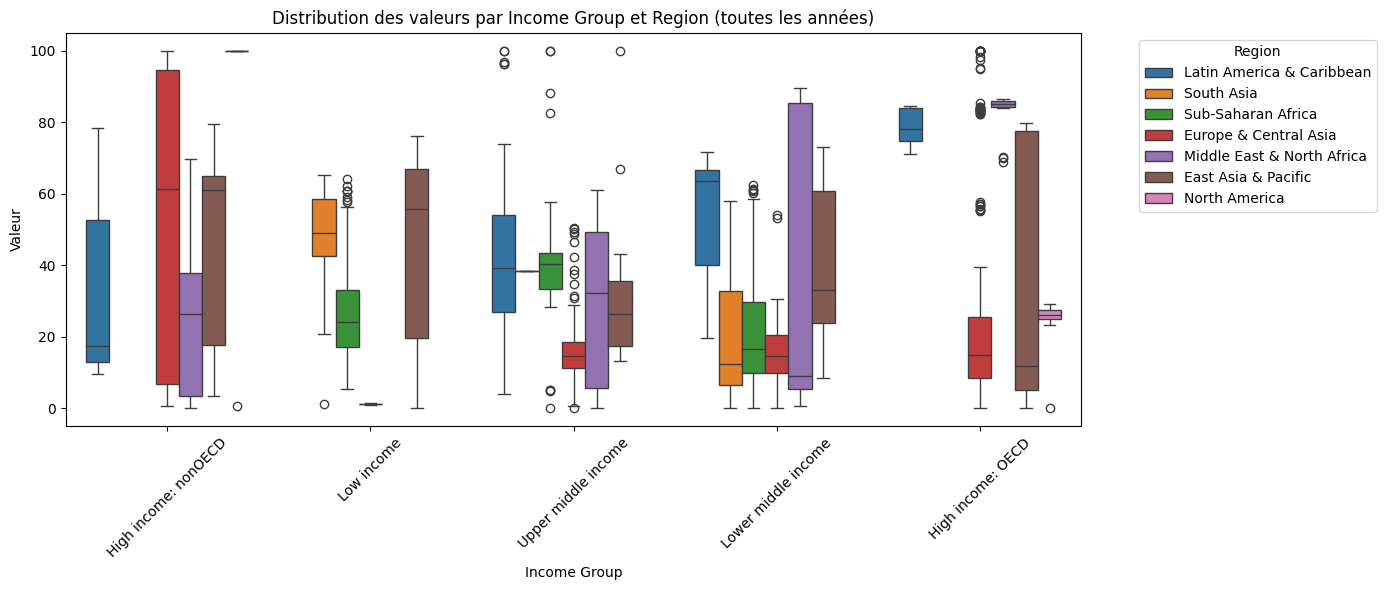

In [213]:
# 2) Melt : format long
df_long = df_tertiary.melt(
    id_vars=["Country Name", "Region", "Income Group"],
    value_vars=years_ter,
    var_name="Year",
    value_name="Value"
)

# Convertir en numérique si nécessaire
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

# 3) Filtrer les Income Group si tu veux
income_groups = [
    "High income: OECD",
    "High income: nonOECD",
    "Low income",
    "Lower middle income",
    "Upper middle income"
]
df_long = df_long[df_long["Income Group"].isin(income_groups)]

# 4) Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x="Income Group",
    y="Value",
    hue="Region",
    data=df_long
)
plt.title("Distribution des valeurs par Income Group et Region (toutes les années)")
plt.xlabel("Income Group")
plt.ylabel("Valeur")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:

# Transformation longue
df_eco_taux = df_eco.melt(
    id_vars=[col for col in df_eco.columns if col not in years_to_check],
    value_vars=years_to_check,
    var_name='Year',
    value_name='Taux'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x="Income Group", 
    y="Taux", 
    data=df_eco_taux, 
    order=["High income: nonOECD"]
)

plt.title("Boxplot de l'évolution du GNI par Income Group")
plt.ylabel("GNI")
plt.xlabel("Groupe de revenu")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = df_euro_ter["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_euro_ter.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_euro_ter.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

In [ ]:
# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2016 = df_tertiary["2016"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_tertiary.loc[mask_missing_2016.index[mask_missing_2016], "2016"] = \
    df_tertiary.loc[mask_missing_2016.index[mask_missing_2016], "2015"]

# 2. Trouver les pays avec une valeur manquante en 2016
mask_missing_2015 = df_tertiary["2015"].isna()

# 3. Remplacer les NaN de 2016 par la valeur de 2015
df_tertiary.loc[mask_missing_2015.index[mask_missing_2015], "2015"] = \
    df_tertiary.loc[mask_missing_2015.index[mask_missing_2015], "2014"]

In [ ]:
countries_missing = df_tertiary.loc[df_tertiary["2016"].isna(), "Country Name"].tolist()
countries_missing 

In [ ]:
df_tertiary[df_tertiary["2016"].isna()]

In [ ]:
def compute_scores(df, weights, education_as_gap=False, top_n=10):
    """
    Calcule un score pondéré par pays et renvoie le top N.
    """
    df = df.copy()
    scaler = MinMaxScaler()
    df_norm = pd.DataFrame(
        scaler.fit_transform(df[['Population','Economie','Internet','Education']]),
        columns=['Population','Economie','Internet','Education']
    )
    df_norm['Pays'] = df['Pays'].values

    # si "gap" éducation => besoin non couvert
    if education_as_gap:
        df_norm['Education'] = 1 - df_norm['Education']

    # calcul du score
    df_norm['Score'] = sum(df_norm[k] * v for k, v in weights.items())

    # tri décroissant
    return df_norm.sort_values('Score', ascending=False).reset_index(drop=True).head(top_n)